<a href="https://colab.research.google.com/github/francescapoli98/pattern-recognition-systems/blob/main/m1_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Intelligent Systems for Pattern Recognition: midterm 1**

#### Francesca Poli [560190]

##### **Assignment 3: signal processing**

The musical pitch of a note is determined by its fundamental frequency. The pitch played by different instruments sounds different due to harmonics, i.e. other frequencies that are superimposed and determine the timbre of the instrument. [This dataset](https://philharmonia.co.uk/resources/sound-samples/) contains samples from several instruments playing different notes. Plot the spectrogram for some of them (4 instruments are sufficient) and check if it is possible to recognize the different instruments by only looking at the spectrogram. In your presentation, discuss which samples you chose to compare, how you computed the spectrogram and whether the resulting features are sufficient to recognize the instrument.

In Python you can import WAVs (and acces several other music-related functions), using the [LibROSA](https://librosa.org/doc/latest/index.html) library.

#### Starting with LibROSA library

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
#some always-useful libraries
import numpy as np
import matplotlib.pyplot as plt

Let's get started with librosa!

In [3]:
%pip install librosa

%pip install pydub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import librosa
print(librosa.__version__)

0.10.0.post1


#### Loading the dataset with all instruments and setting the data

In [5]:
import re
import os as os, fnmatch as f
from os import path 
from pydub import AudioSegment


dirpath = '/content/drive/MyDrive/ISPR/midterm1/all-samples'

all_instruments=[]


for dir in os.listdir(dirpath):
  all_instruments.append(dir)

In [6]:
#list of all the instruments at disposal
list(all_instruments)

['viola',
 'saxophone',
 'guitar',
 'percussion',
 'mandolin',
 'trumpet',
 'trombone',
 'oboe',
 'tuba',
 'violin',
 'contrabassoon',
 'flute',
 'clarinet',
 'banjo',
 'double bass',
 'bass clarinet',
 'french horn',
 'cor anglais',
 'bassoon',
 'cello']

I choose four instruments to complete the initial task. Don't mind me if I go for a string quartet!

In this section I select the audio files that are in common with the four instrument of choice.

In [7]:
quartet = ['violin', 'viola', 'cello', 'double bass']
instruments={}

for elem in quartet:
  newpath=str(dirpath+'/'+elem)
  keyelem=elem.replace(' ','-')
  instruments[keyelem]=[]
  
  for filename in os.listdir(newpath):
    instruments[keyelem].append(filename) #sound

In [8]:
sounds={}
for key,value in instruments.items():
  for i in value:
    sub = key.replace(' ','-')
    prefix = str(sub+'_')
    audio = i.removeprefix(prefix)
    if audio not in sounds:
      sounds[audio]=list()
      sounds[audio].append(key)
    else:
      sounds[audio].append(key)

In [9]:
import warnings
warnings.filterwarnings('ignore')

mysounds=[]

for key, value in sounds.items():
  if len(value)>3:
    if key not in mysounds:
      mysounds.append(key)

In [10]:
notes=[]
for s in mysounds:
  note = s[:s.index('_')]
  if note not in notes:
    notes.append(note)
list(notes)

['Cs4',
 'D4',
 'Ds4',
 'E4',
 'F4',
 'Fs4',
 'G3',
 'G4',
 'Gs3',
 'A3',
 'As3',
 'B3',
 'C4']

In [11]:
a=0
for sound in mysounds:
  if re.findall('(D4|Ds4)',sound):
    a+=1
print(a)

8


#### Waveforms and spectrograms 

##### Waveform

Here some basic waveforms of D4 (and Ds4) note are plotted for every instrument in order to see the difference in compactnessof the audio time series.

The choice of selecting just one note through all the various in form is made to simplify and restrict the plot, which would otherwise be extremely invasive.

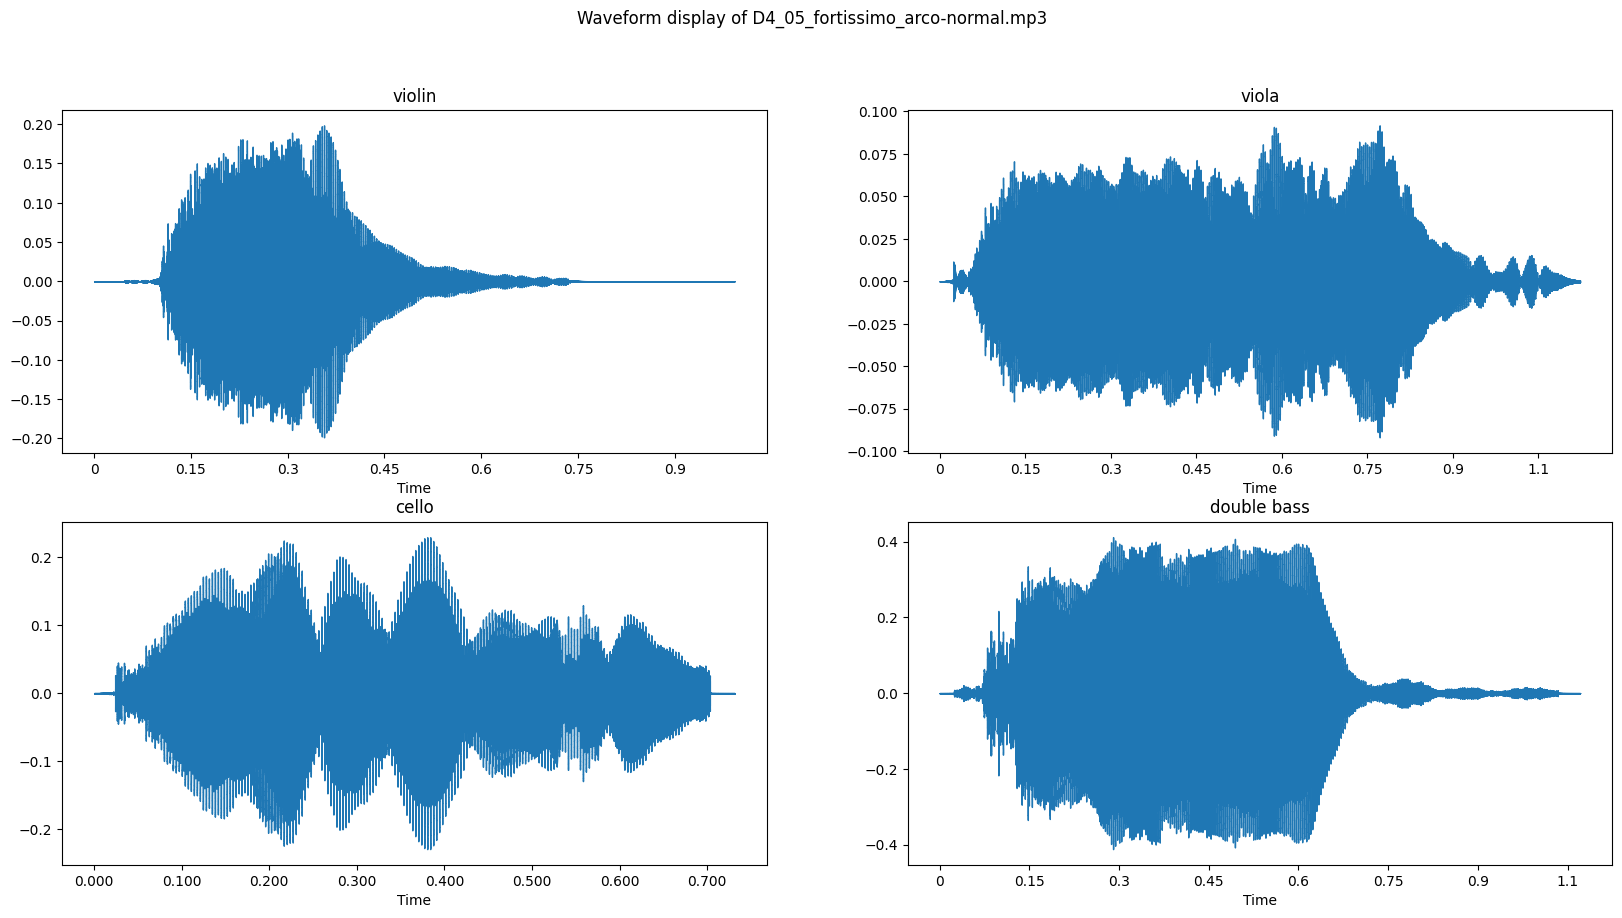

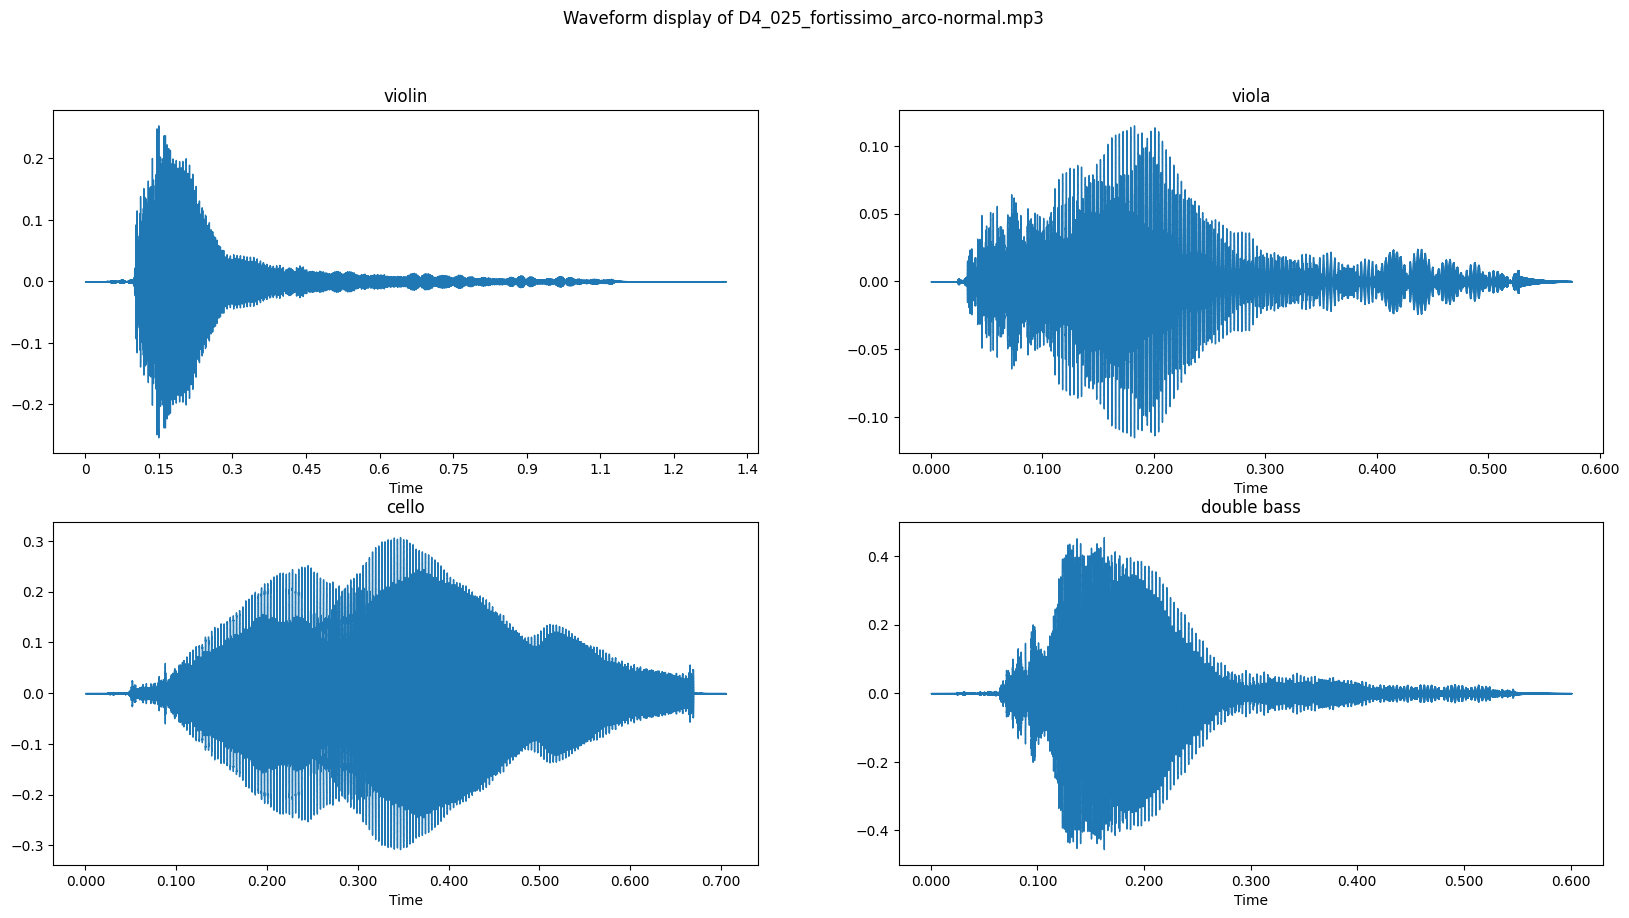

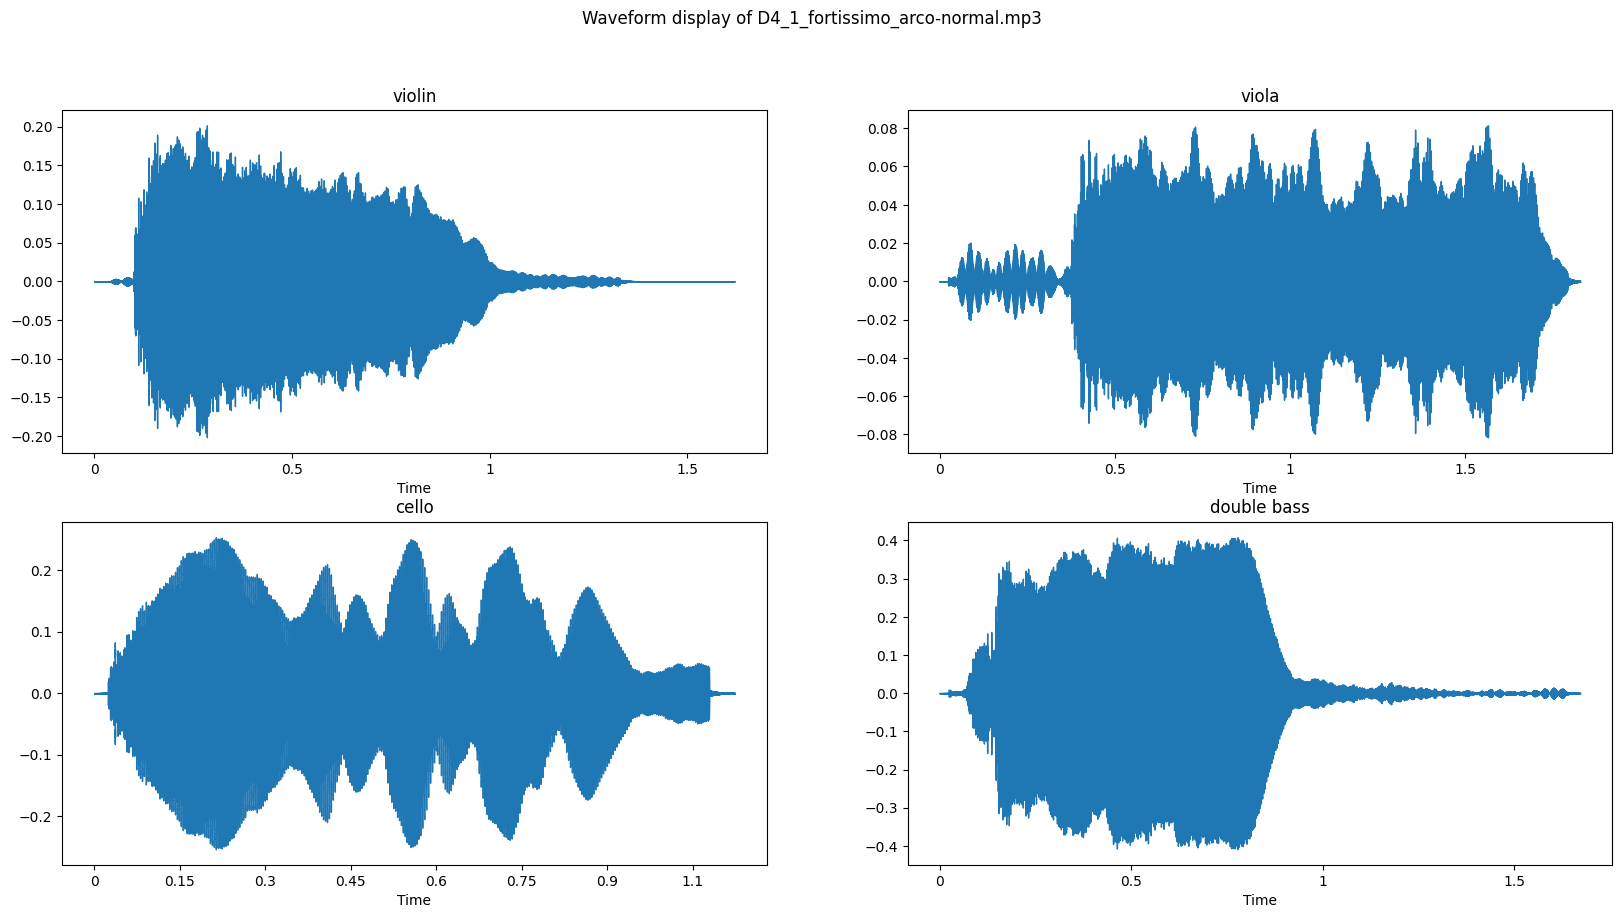

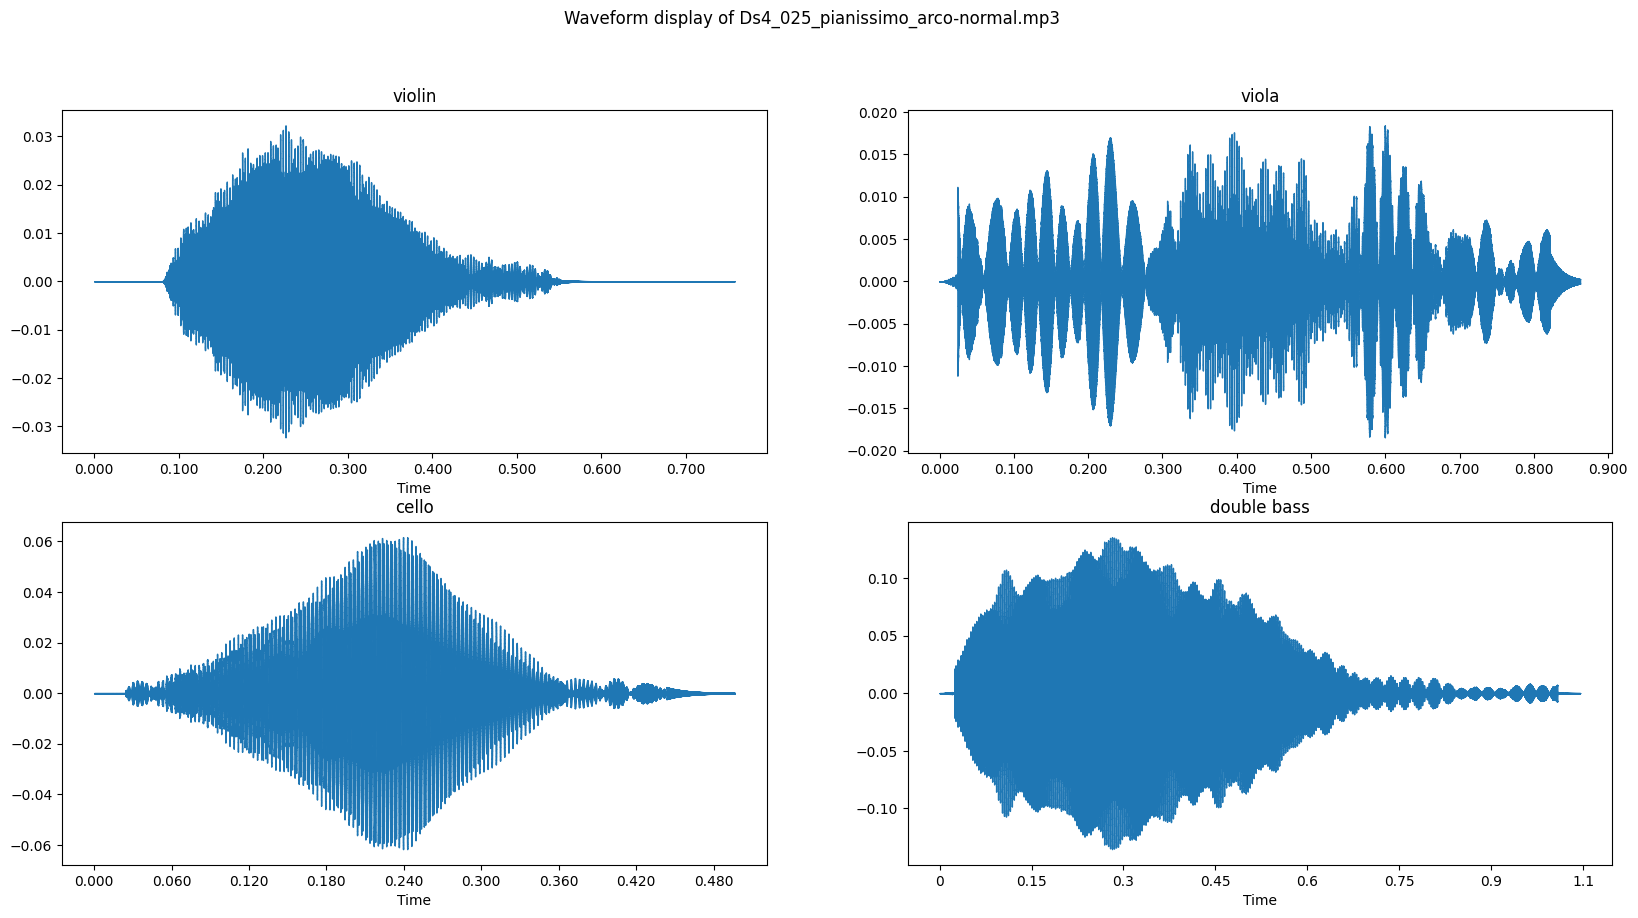

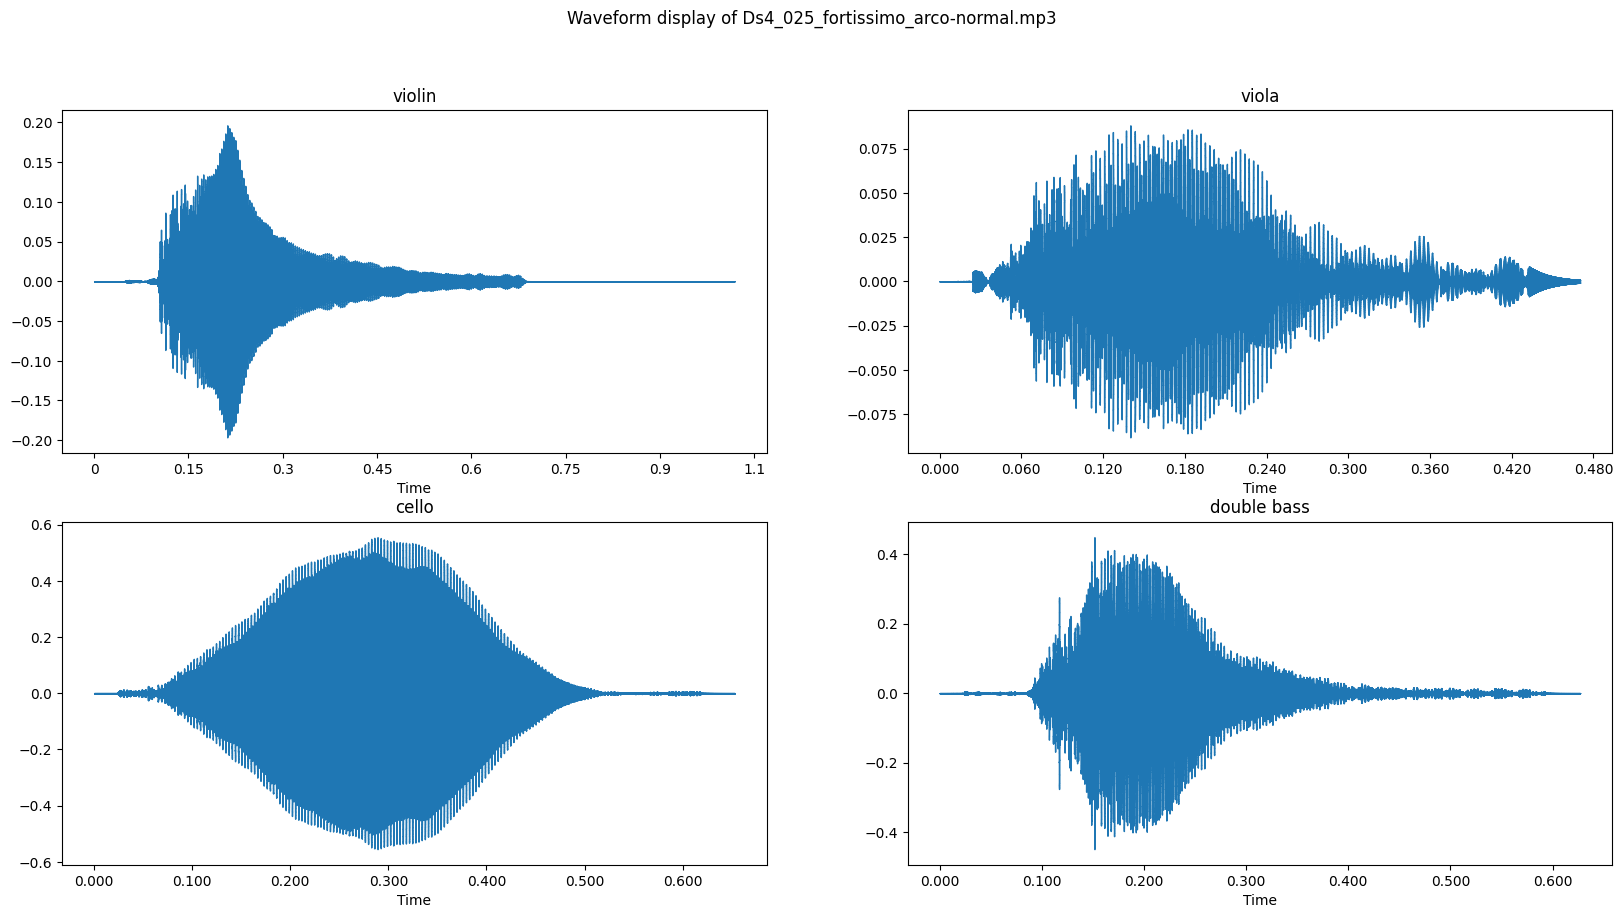

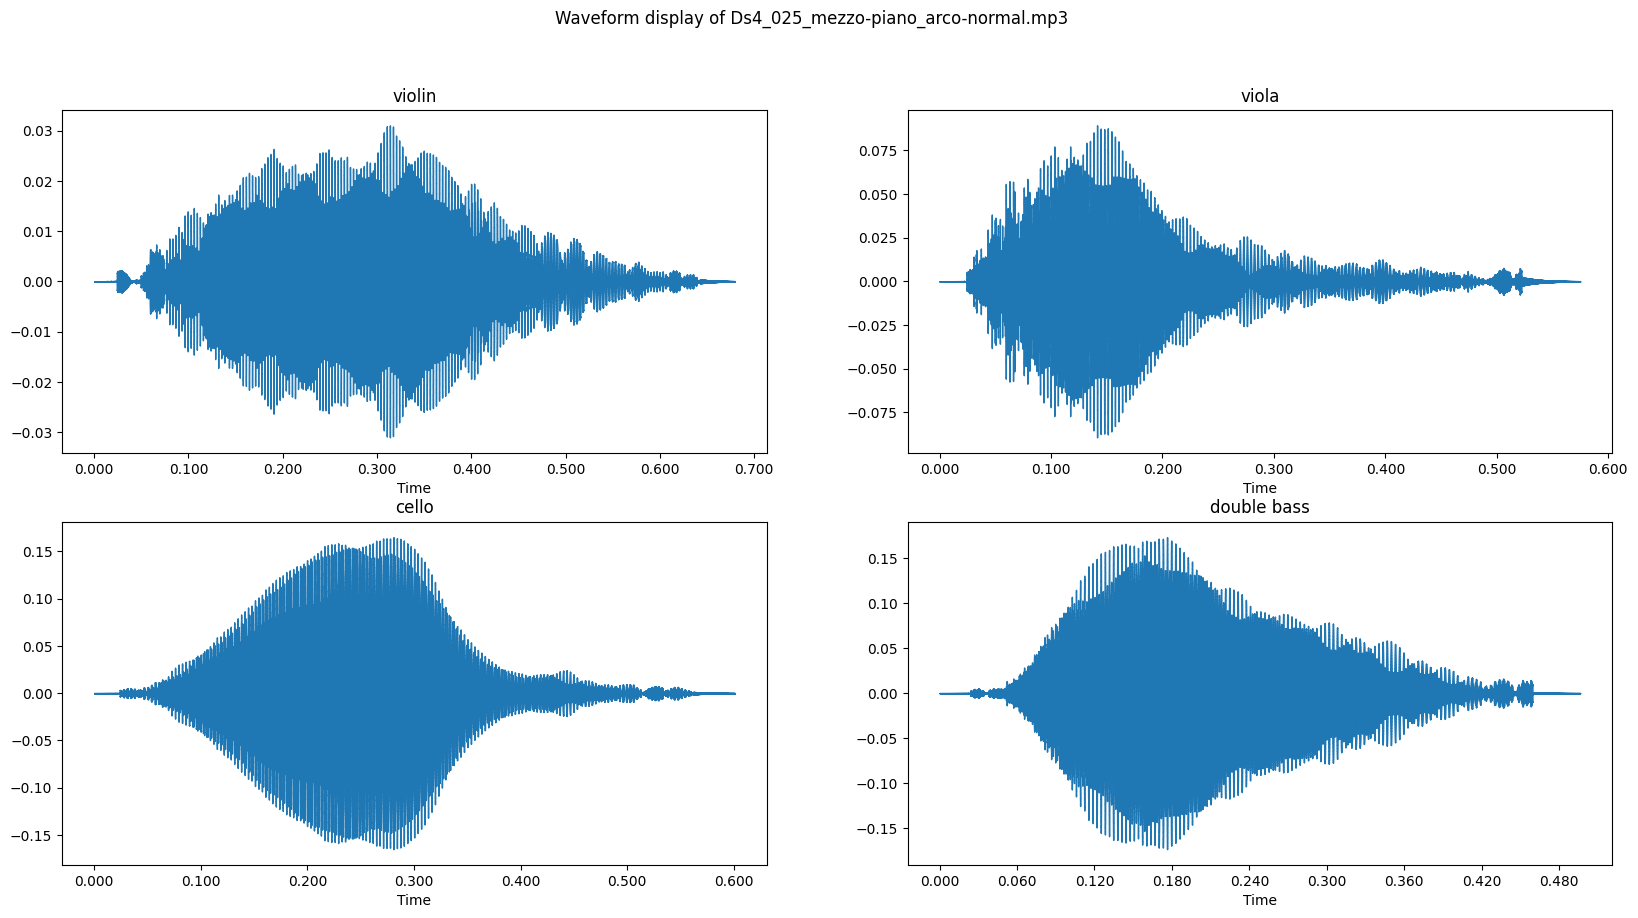

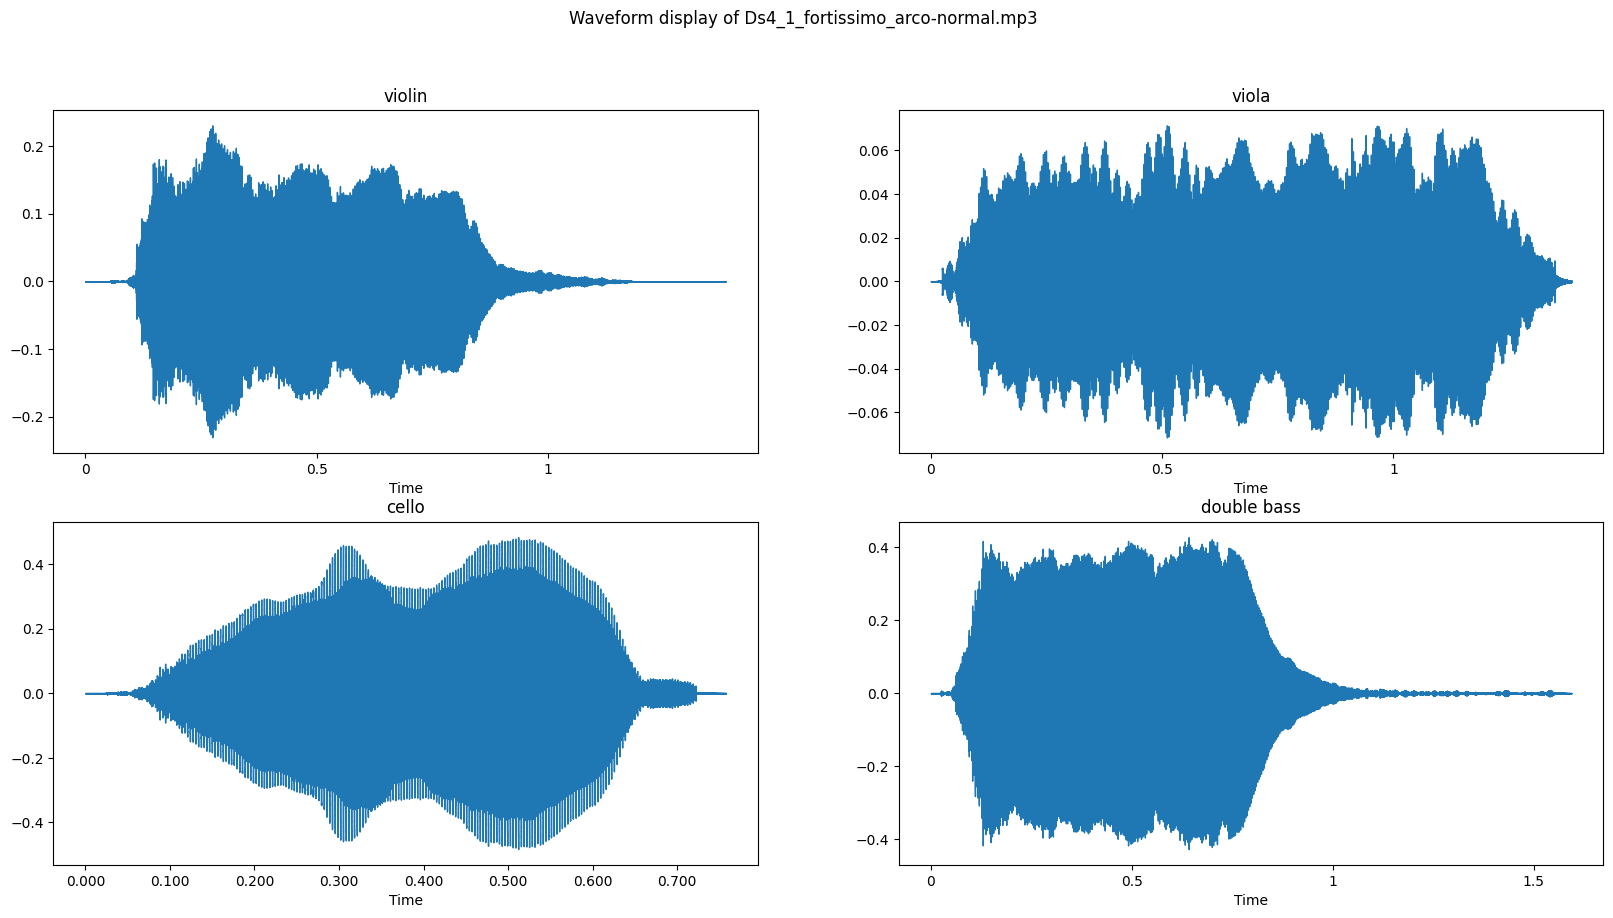

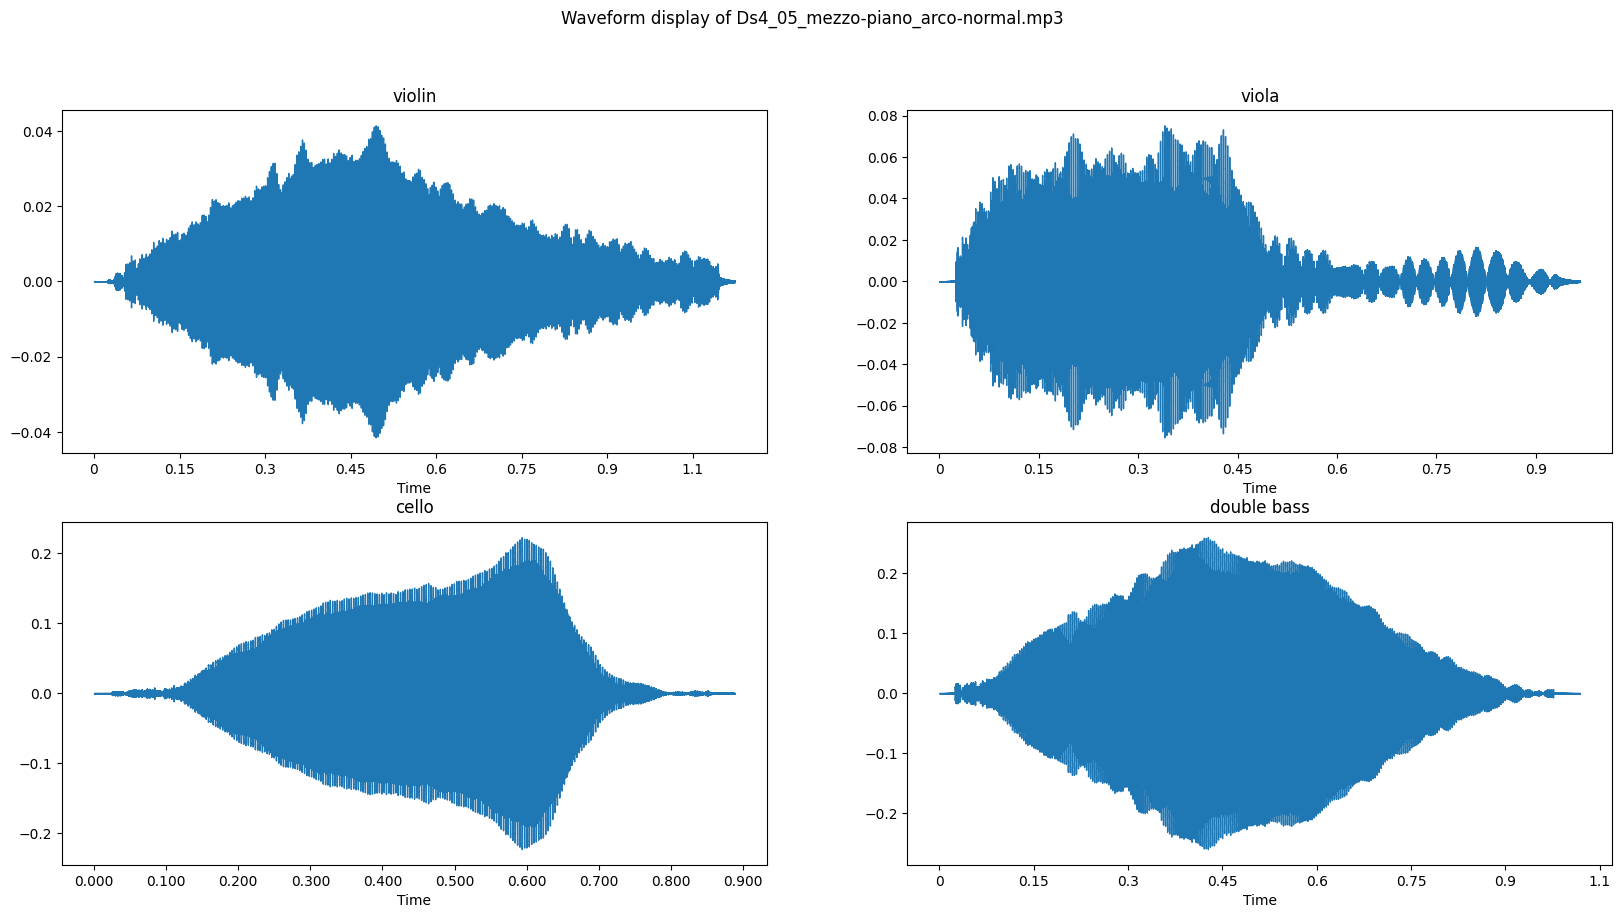

In [12]:
import librosa.display

for sound in mysounds:
  if re.findall('(D4|Ds4)', sound):
    fig = plt.figure(figsize=(20, 10), dpi=100)
    fig.suptitle('Waveform display of '+sound)
    k = 0
    for inst in quartet:
      for i in os.listdir(dirpath+'/'+inst):
        if f.fnmatch(i,'*{}'.format(sound)): 
# load files
          y, sr = librosa.load(dirpath+'/'+inst+'/'+i)
# plot
          k=k+1
          ax = fig.add_subplot(2,2,k)
          ax.title.set_text(inst)
          img = librosa.display.waveshow(y, sr=sr, ax=ax)

    plt.show()

From those waveforms, or time series, we can deduce some behaviours of the various instruments, making them mostly recognizable.
- The violin tends to gather the majority of the wavelets around a single peak, while the cello tends to have more rounding forms thanks to the compactness of the waves that shade into one another through time, probably a sign of the high vibrations of the instrument. On the other hand, both the double bass and particularly the viola tend to create a more variant time series, having many sequences, even repeated ones.
- Among the modulations the wavelets' levels tend to create a compact center where it's impossible to differentiate them and understand the characteristic frequencies of the instrument.
- Altough, in the *mezzo piano* and *pianissimo* plots, the frequencies are more sparse, showing the peaks on the time series that might be actually helpful in identifying the instrument and even the softier vibrations.

##### Linear frequency spectrograms

Firstly, we sart by plotting the power spectrograms of every D4/Ds4 sample from every instrument and variation, in order to see how it changes.

For the majority of the plots the spectrogram doesn't seem useful in detecting the instrument, but in the case of the violin the black area on the right of almost all the plots (the area with approximately -0.8 dB, the same visibile in the time series as the long tail that follows the area of the single peak and major concentration of wavelets) makes it easily recognizable and classifiable.

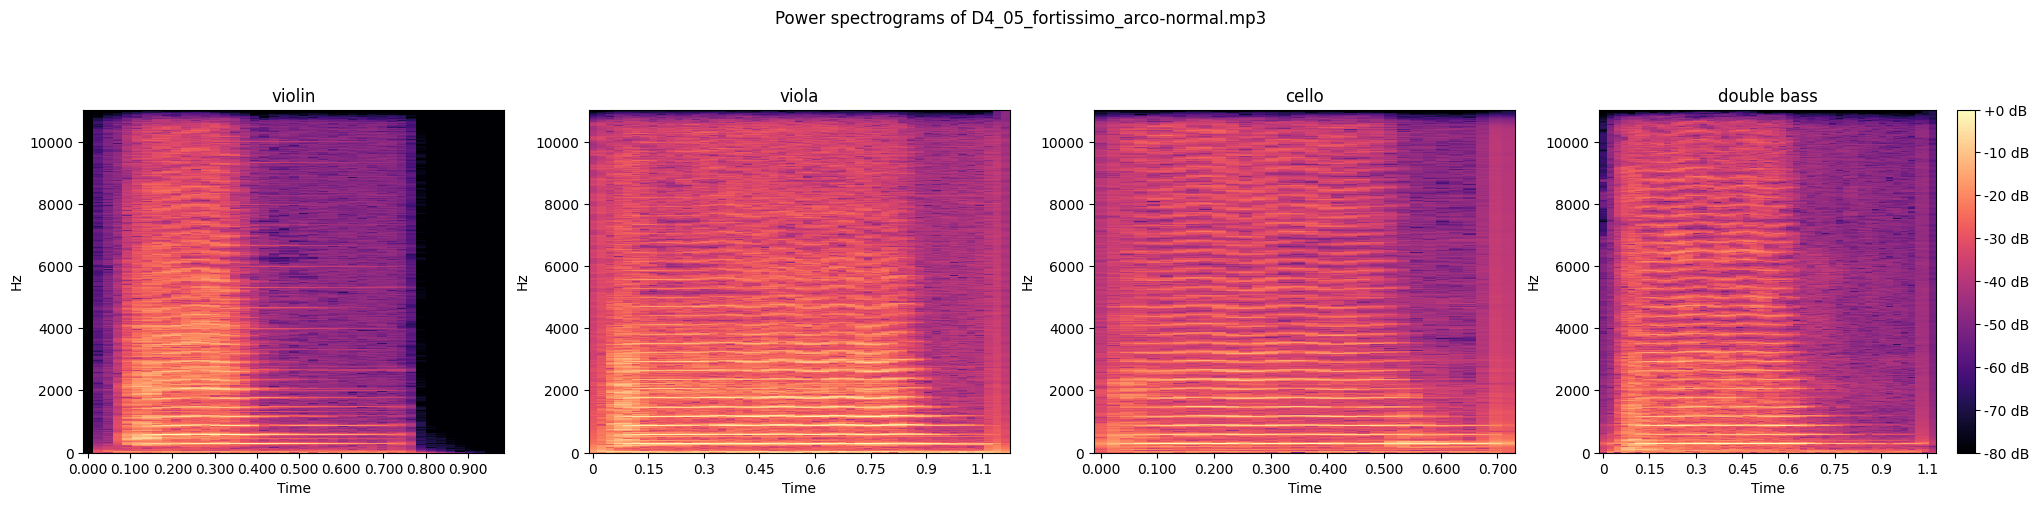

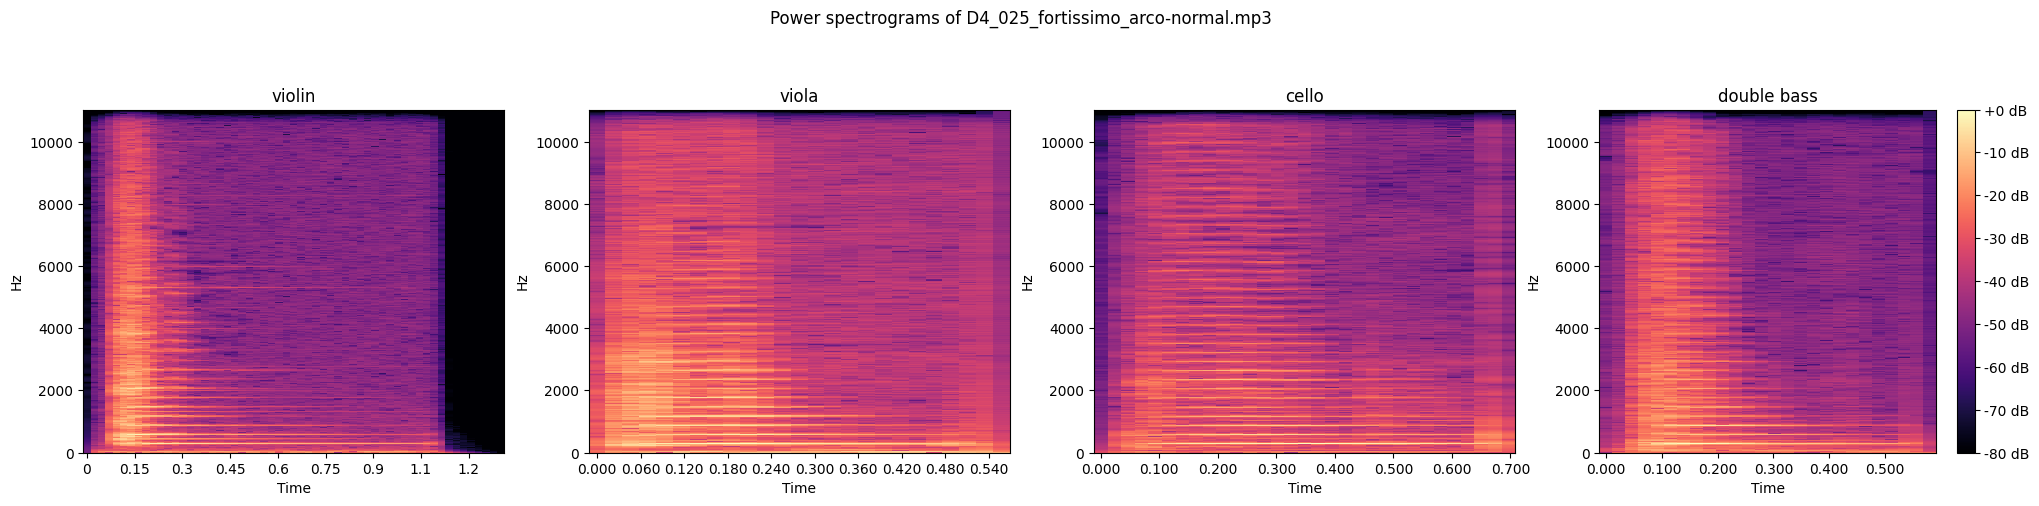

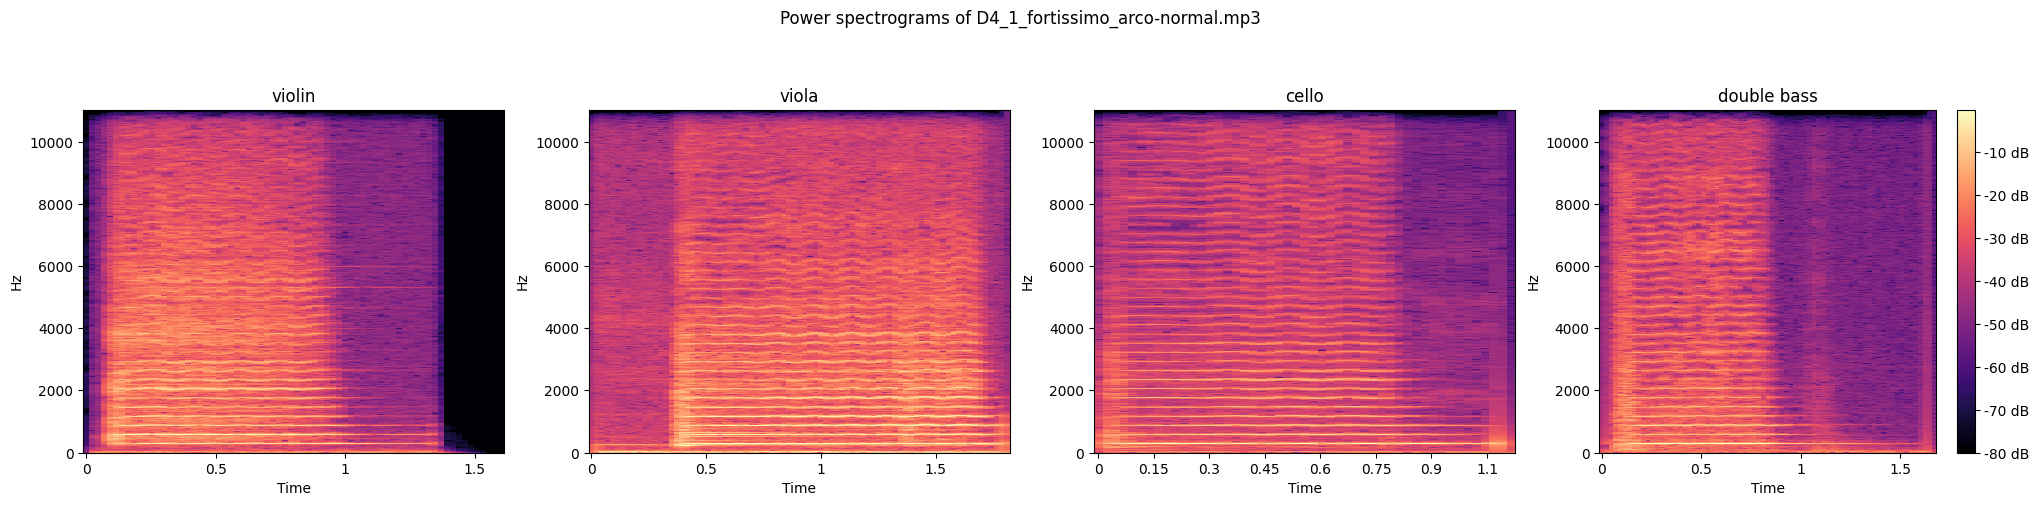

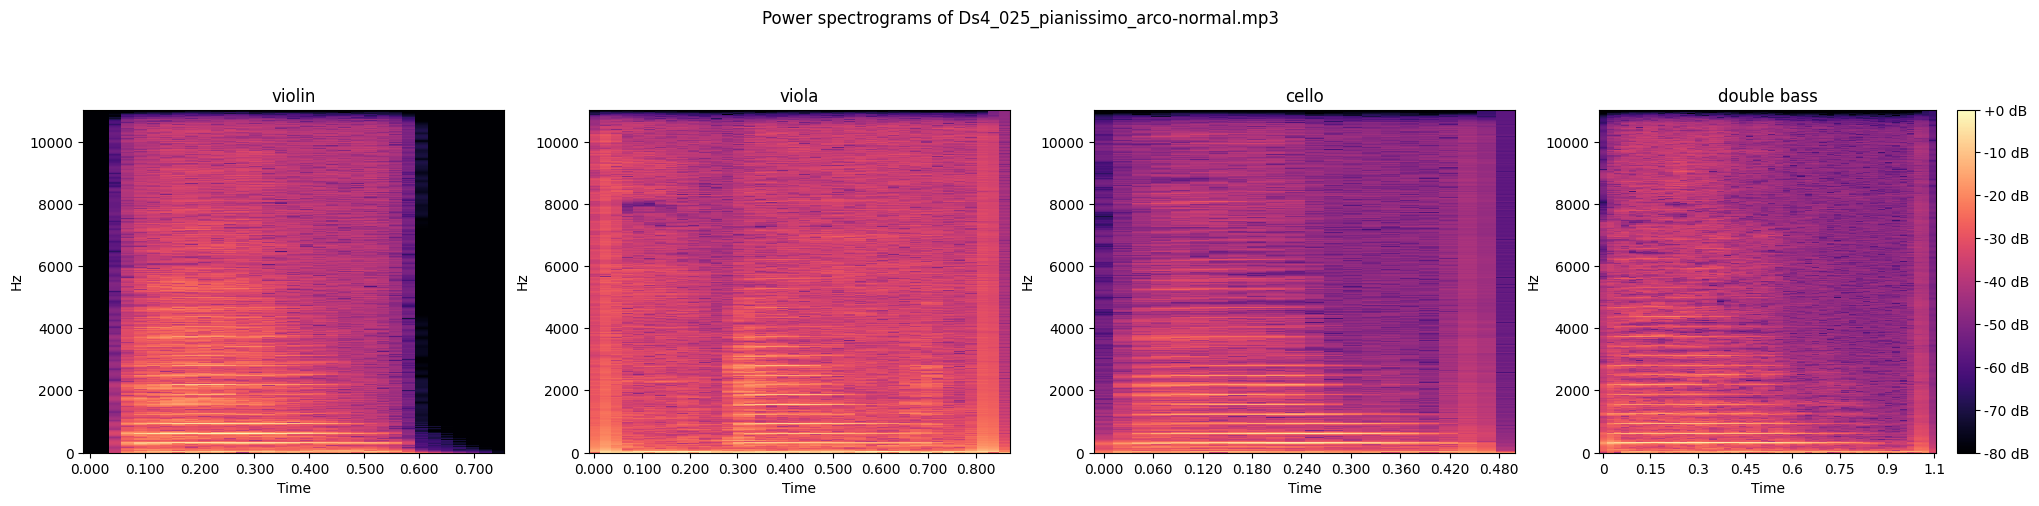

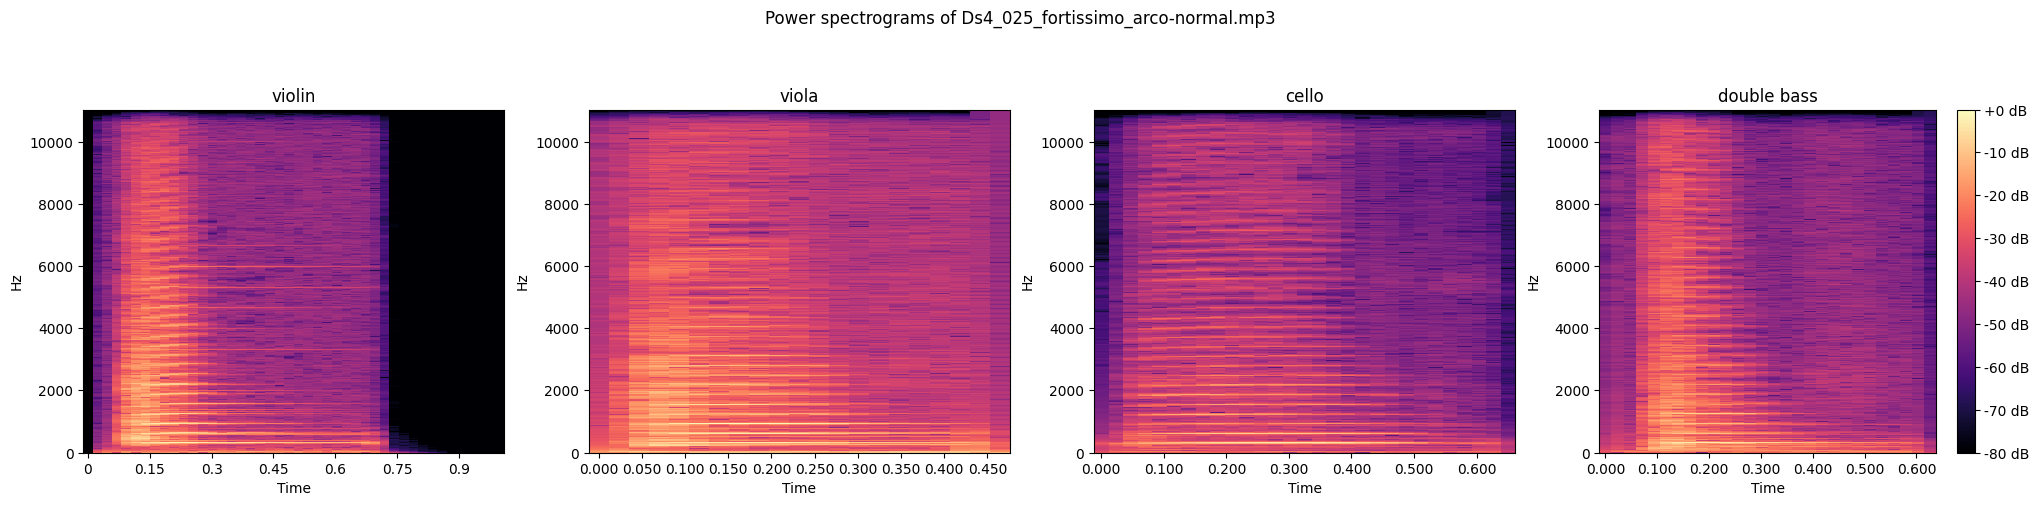

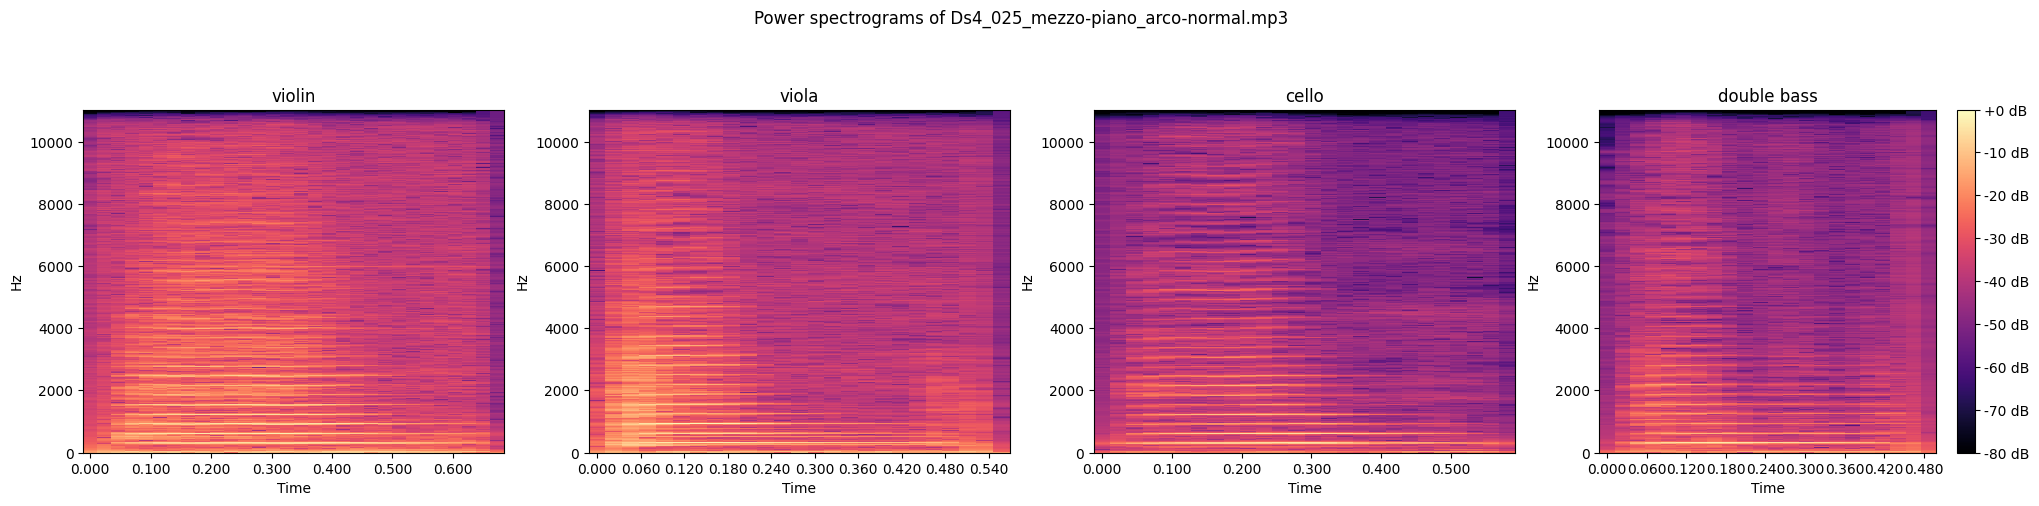

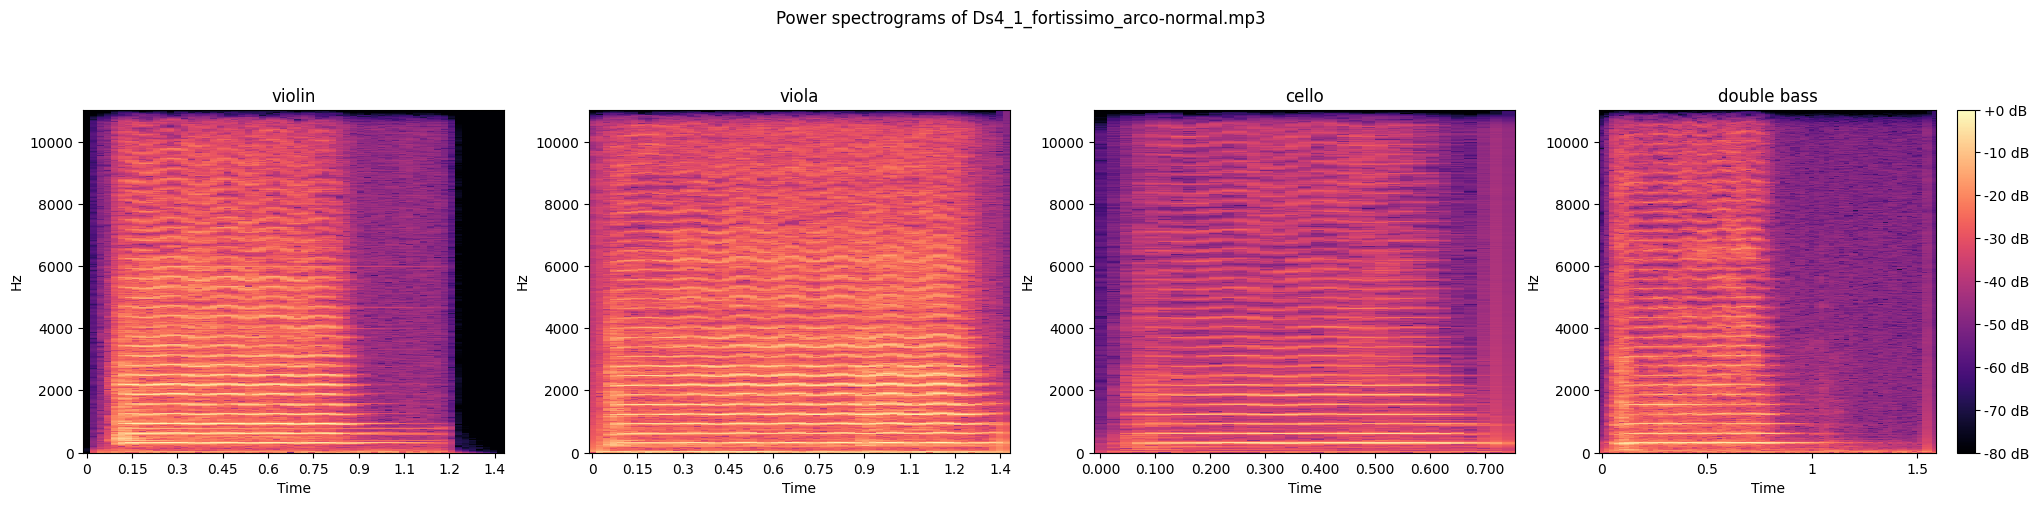

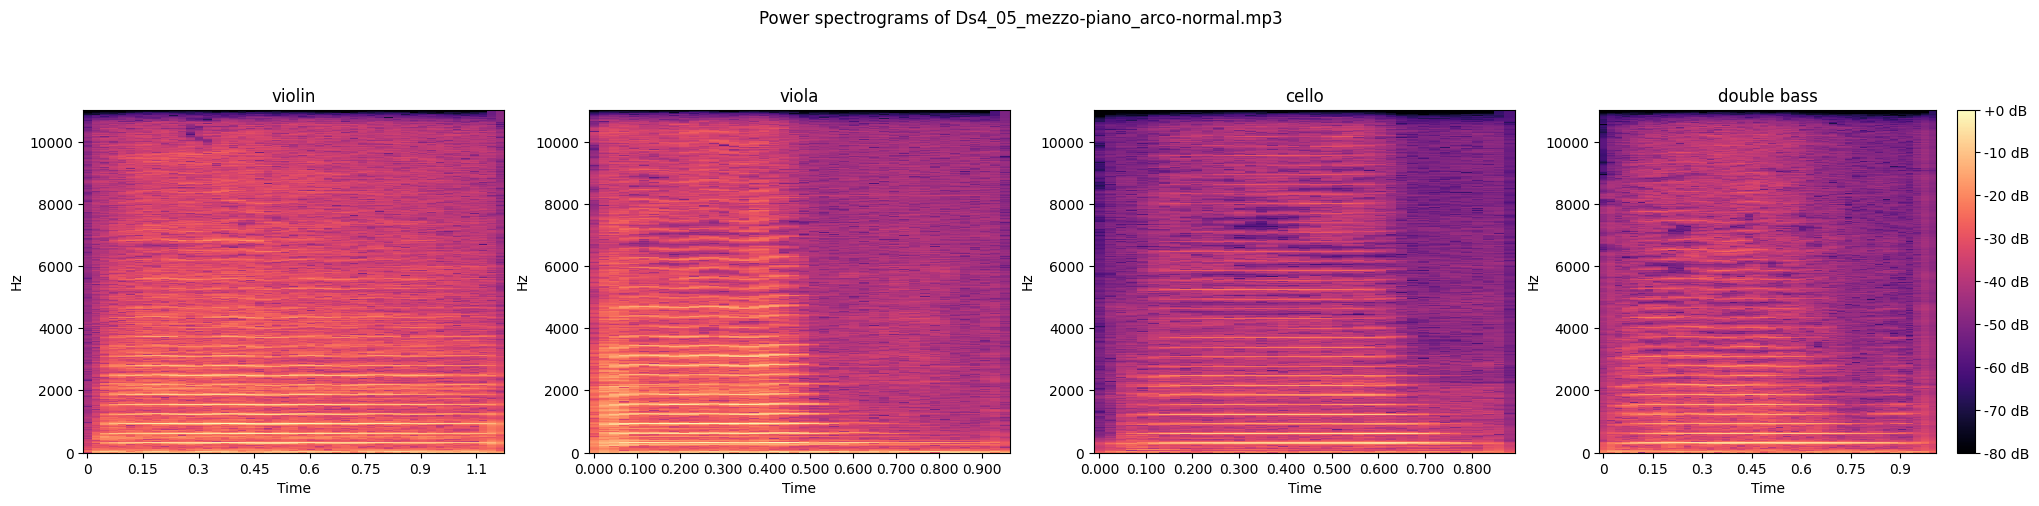

In [13]:

for sound in mysounds:
  
  if re.findall('(D4|Ds4)', sound):

    fig = plt.figure(figsize=(25, 10), dpi=100)
    fig.suptitle('Power spectrograms of '+sound)

    k = 0

    for inst in quartet:

      for i in os.listdir(dirpath+'/'+inst):

        if f.fnmatch(i,'*{}'.format(sound)):
# load files
          y, sr = librosa.load(dirpath+'/'+inst+'/'+i)
# STFT of y
          D = librosa.stft(y)  
# power
          S_db = librosa.power_to_db(np.abs(D), ref=np.max) 
          
# plot
          k=k+1
          ax = fig.add_subplot(2,4,k)
          ax.title.set_text(inst)
          img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax)
          
    fig.colorbar(img, ax=ax, format="%+2.f dB")
    plt.show()

Secondly, plotting spectrograms of all notes of type *05 pianissimo - arco normal* from the four instruments, in order to see the fundamental note and frequency. The *05 pianissimo - arco normal* modulation of the sound has been chosen as the most representative, with the most variation in the plotting of spectrogram: the samples are quite minimal and the harmonics of the *pianissimo* type help us to better identify the differences among them.


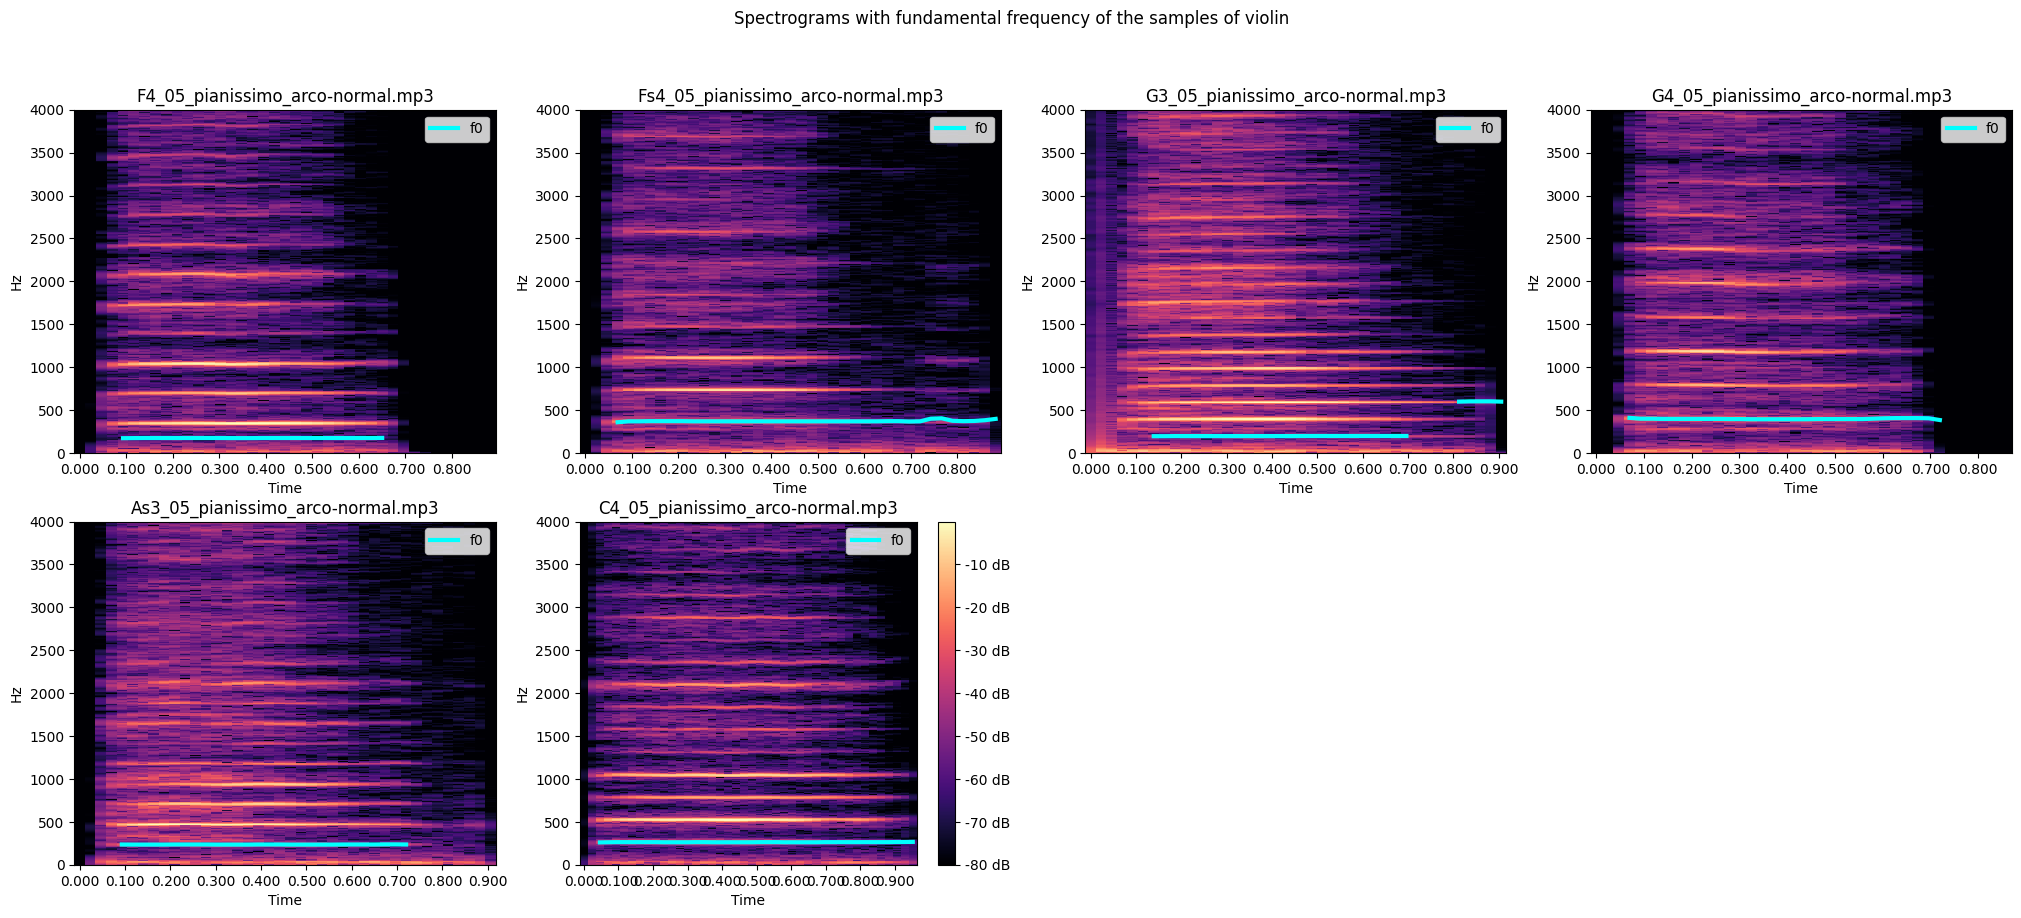

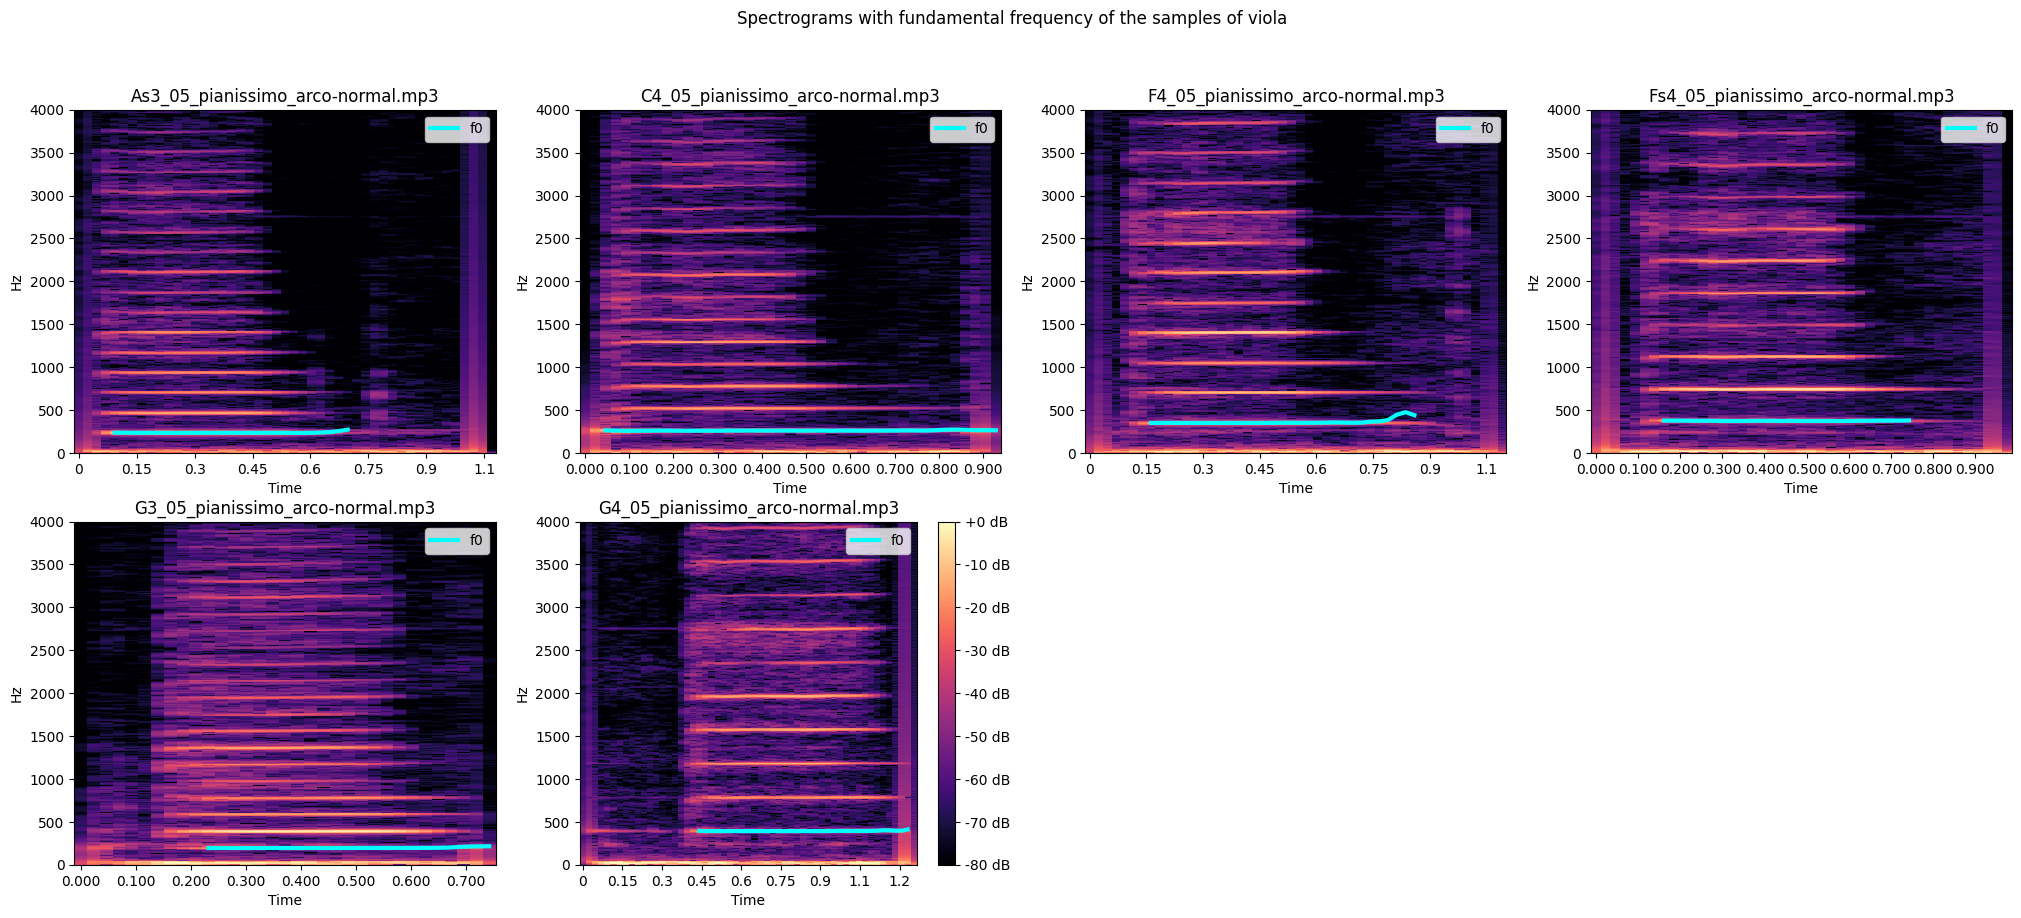

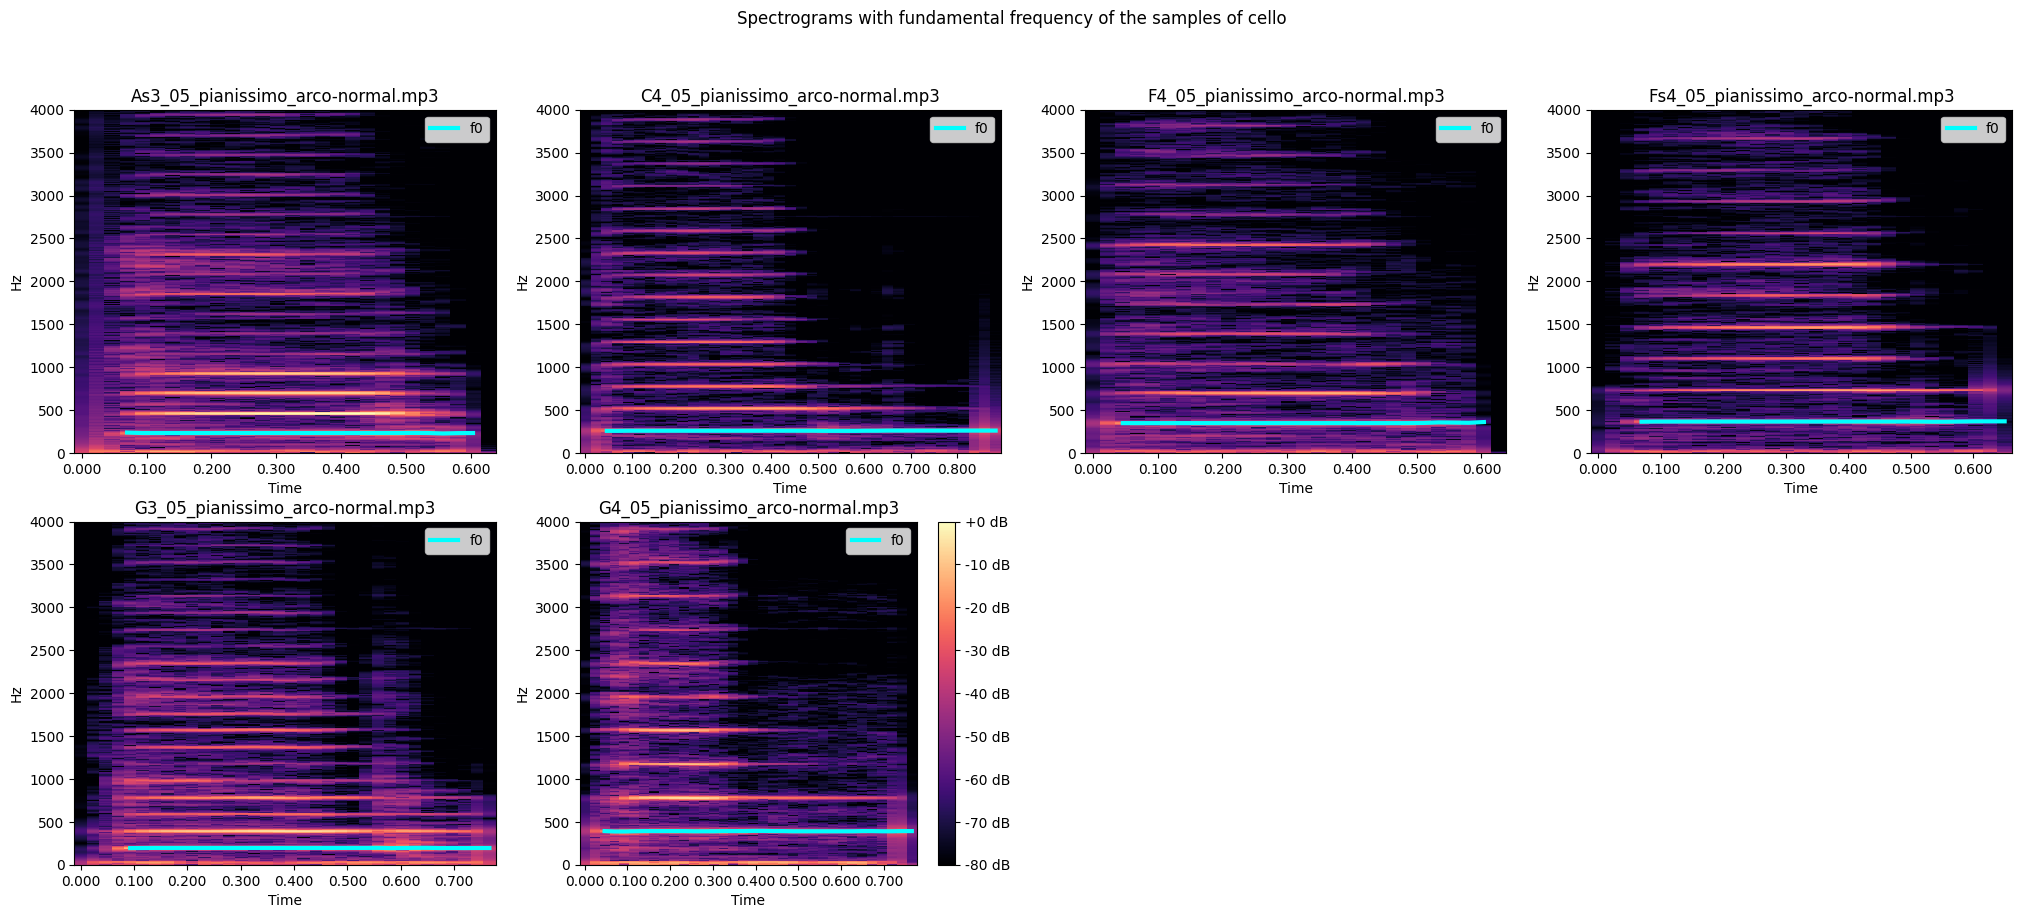

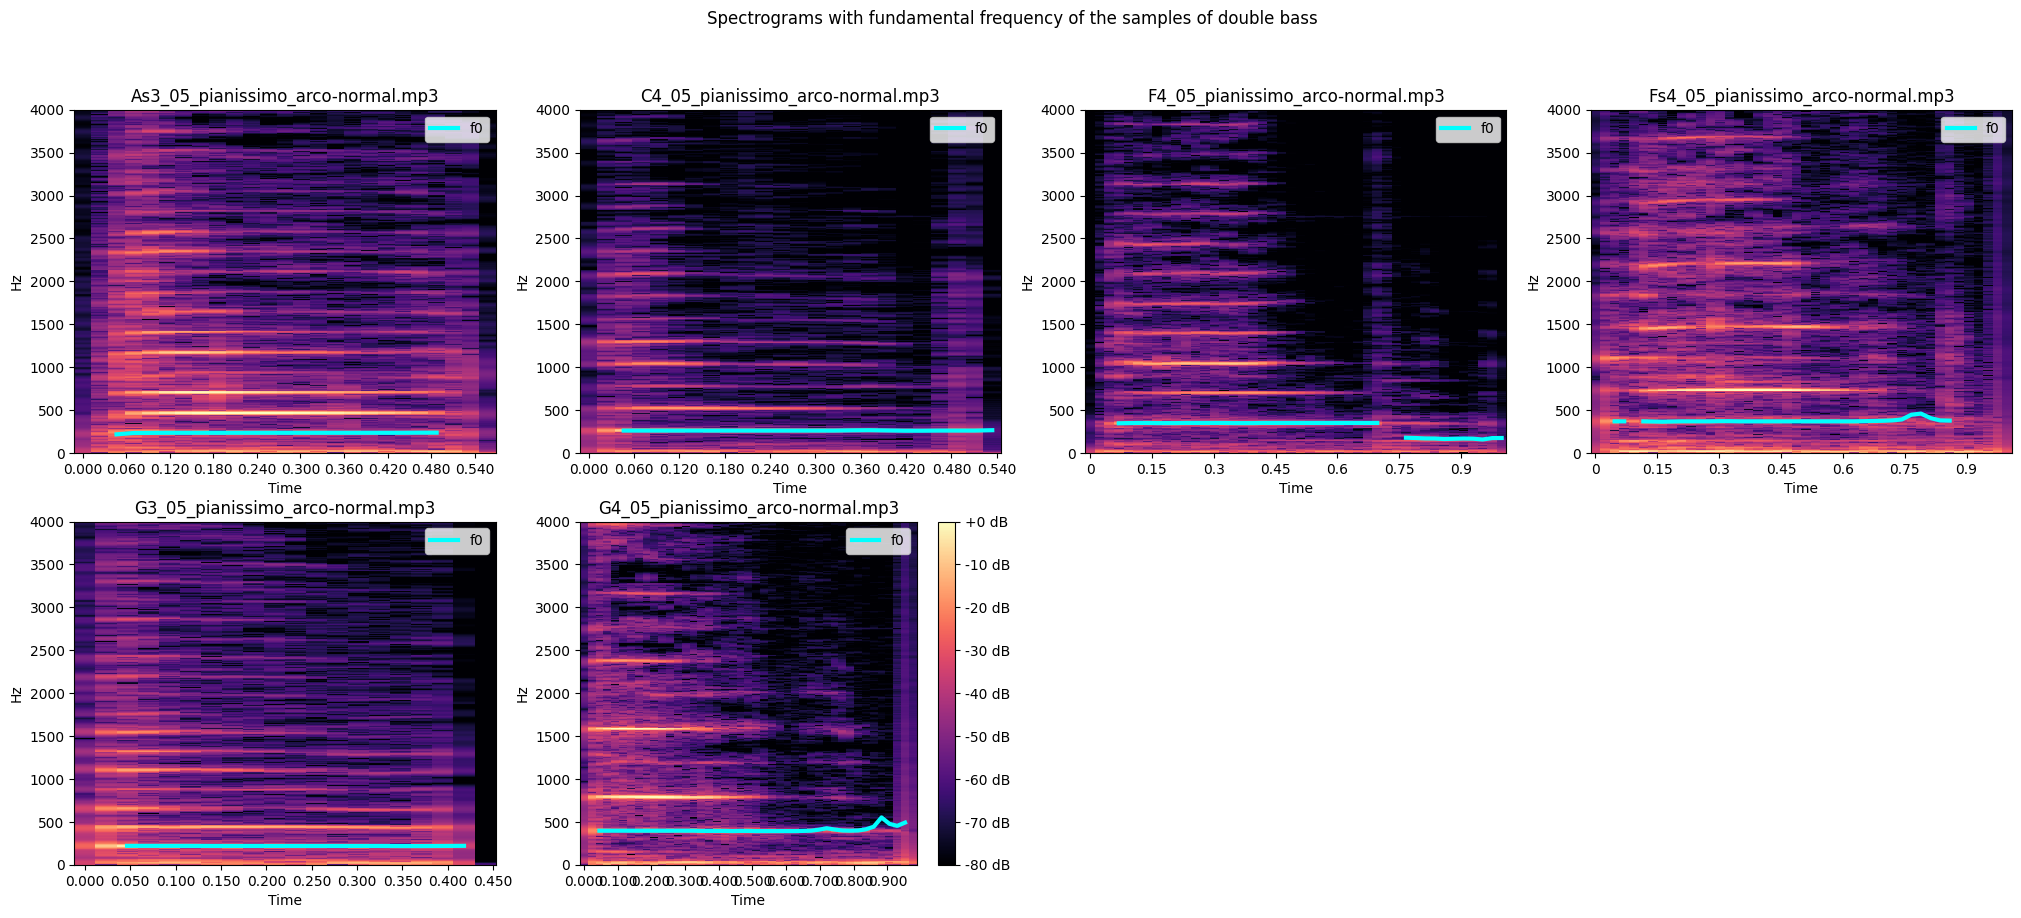

In [21]:
# Spectrograms with pitch

stft={}

for inst in quartet:
  fig = plt.figure(figsize=(25, 10), dpi=100)
  fig.suptitle('Spectrograms with fundamental frequency of the samples of '+inst)

  directory = os.listdir(dirpath+'/'+inst)

  k=0
  #r = int((len([name for name in directory]))/5)

  for i in directory:
    filename=i.removeprefix('{}_'.format(inst.replace(' ','-')))
    
    if filename in mysounds and re.findall('_05_pianissimo_arco-normal.mp3', filename):
# load files
      y, sr = librosa.load(dirpath+'/'+inst+'/'+i)

# Fundamental frequency (F0) estimation using probabilistic YIN (pYIN)
      f0, voiced_flag, voiced_probs = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), boltzmann_parameter=0.1)
      times = librosa.times_like(f0)
# STFT of y
      D = librosa.stft(y)  # Short-time Fourier transform (STFT)
      stft[i]=D
# amplitude
      S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) # Convert an amplitude spectrogram to dB-scaled spectrogram
      
# plot
      k+=1
      ax = fig.add_subplot(2,4,k)
      ax.title.set_text(filename)
      ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
      ax.legend(loc='upper right')
      plt.ylim([0, 4000])
      img = librosa.display.specshow(S_db, x_axis='time', y_axis='linear', ax=ax) # Show the spectrogram
  
  fig.colorbar(img, ax=ax, format="%+2.f dB")
  plt.show()

Spectrograms show how the f0 (fundamental frequency) of every note is similar, always laying in the 0-500 Hz range and mostly linear with no peaks. We must keep in mind that the samples are brief and monotonal, making them difficult to be distinguishable only by looking at the f0 feature.

However, some exceptions might help us and guide us to think that some variation marks a note for an instrument, making it easier to analyze the harmonics of that instrument and note. Some peculiarities that might help us in out task and make spectograms more informative are:
- the distribution of the amplitude through time
- an interruction or a sudden rise/drop in the f0 trace
- the intermingle of the features (how definite are the amplitude lines and if different colors mix up in some areas)
- percentage of black areas 

#### Decomposition of features

##### Chromagrams (Chrome Spectrograms)
The Chroma value of an audio basically represent the intensity of the twelve distinctive pitch classes that are used to study music. They can be employed in the differentiation of the pitch class profiles between audio signals. 

Chroma STFT uses short-term Fourier transformation to compute Chroma features, CQT uses the constant-Q transform. 

They represent information about the classification of pitch and signal structure and depict the spike with high values, while creating dark regions in low values, as evident from the colorbar in the plot.

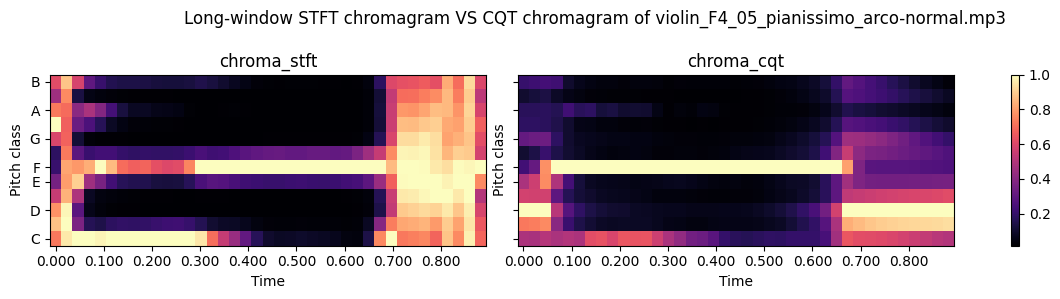

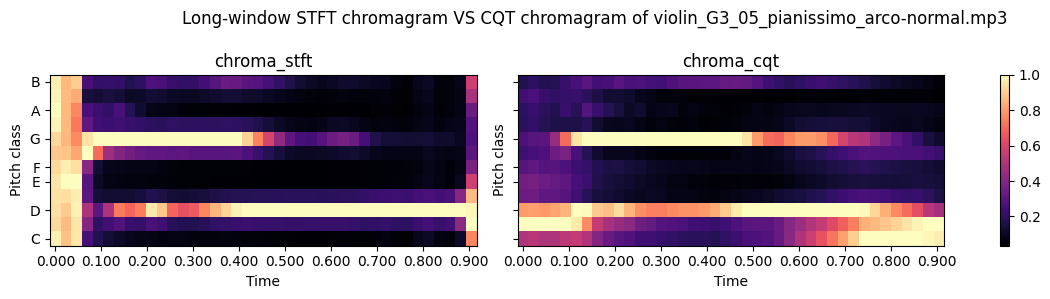

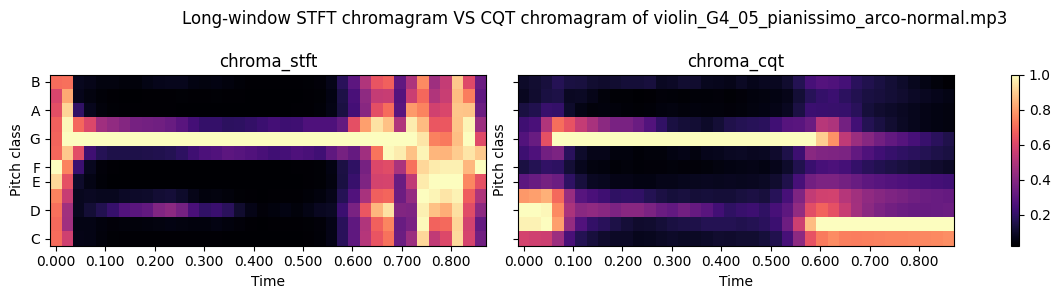

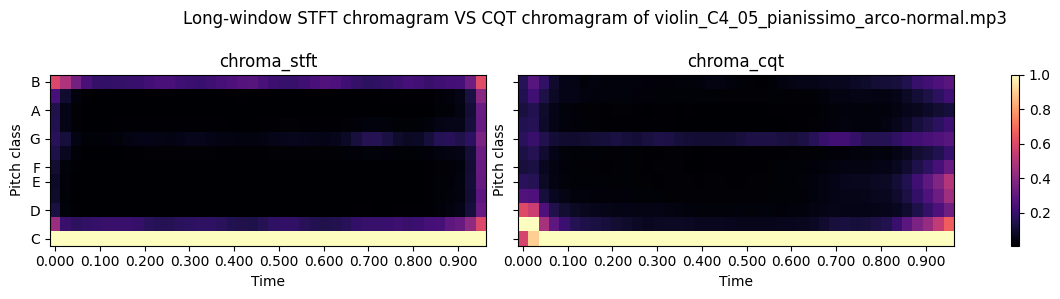

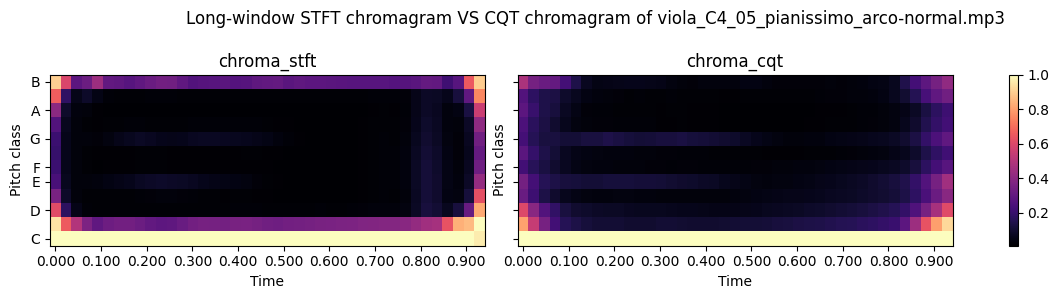

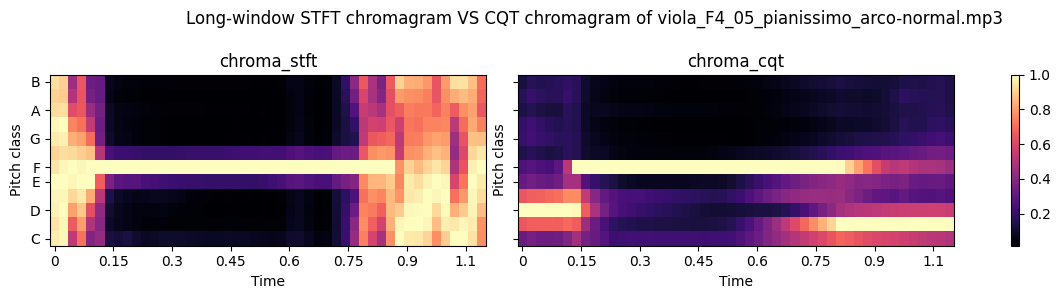

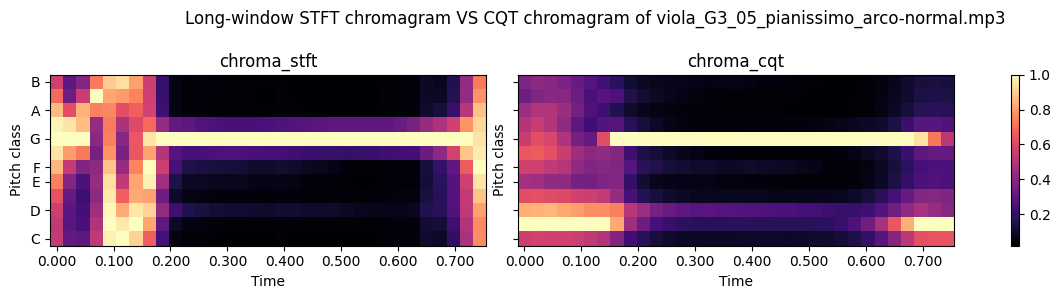

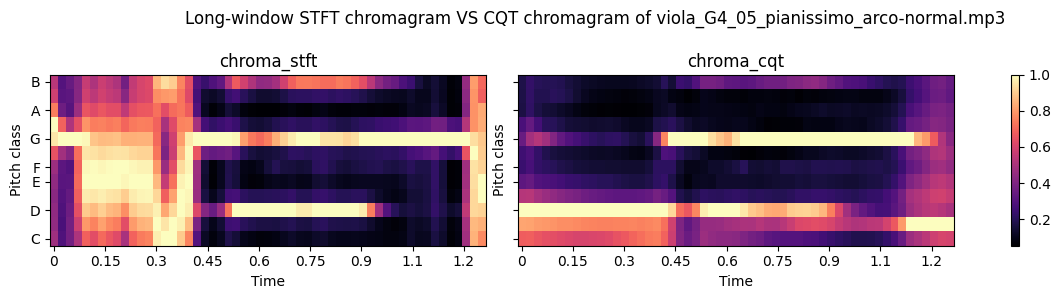

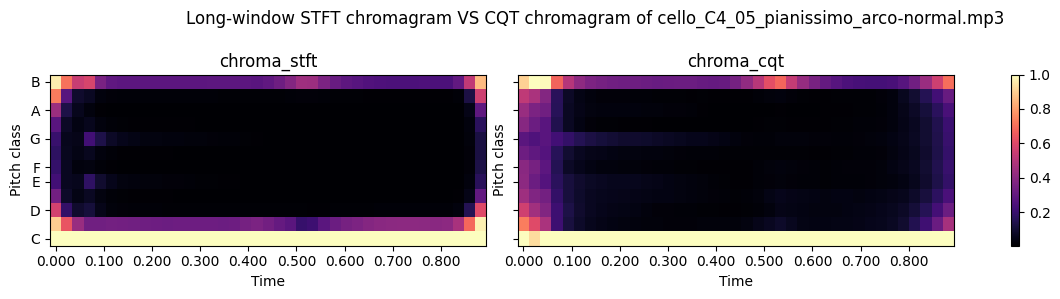

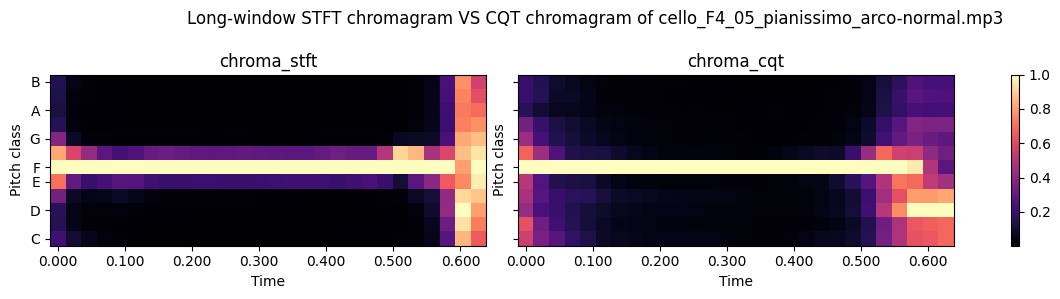

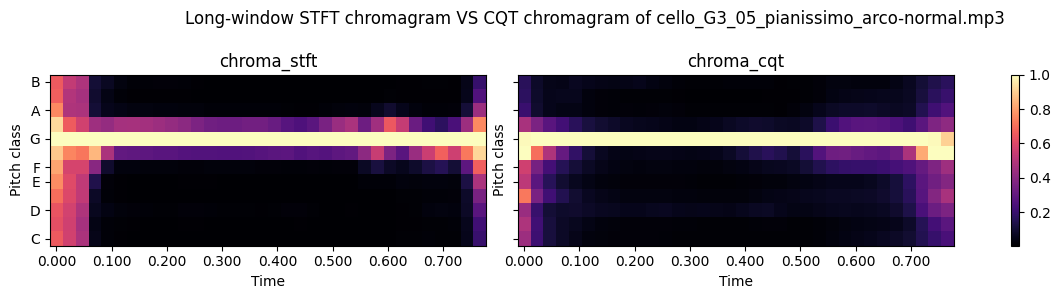

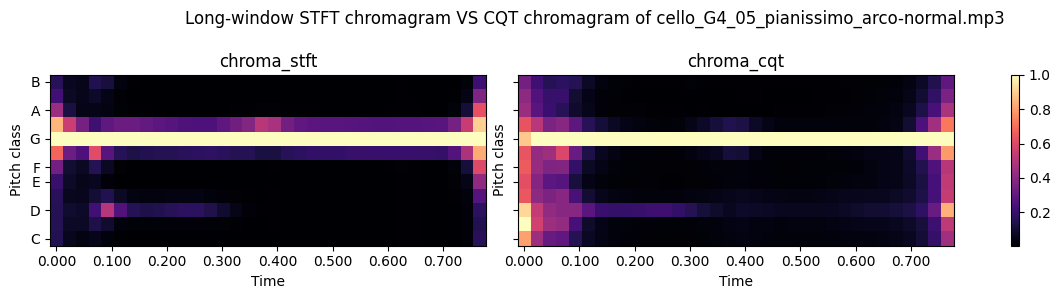

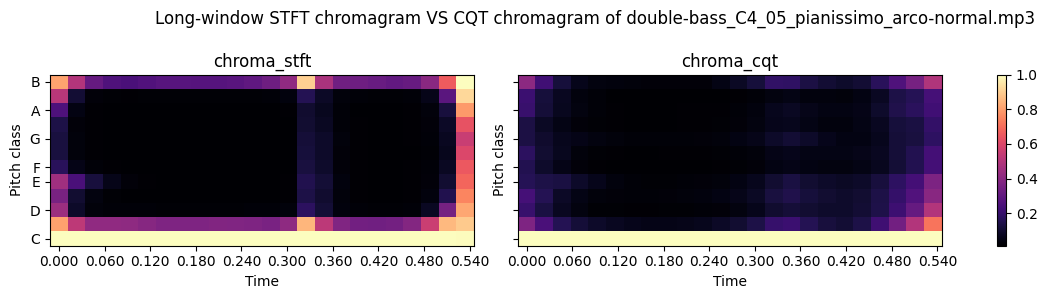

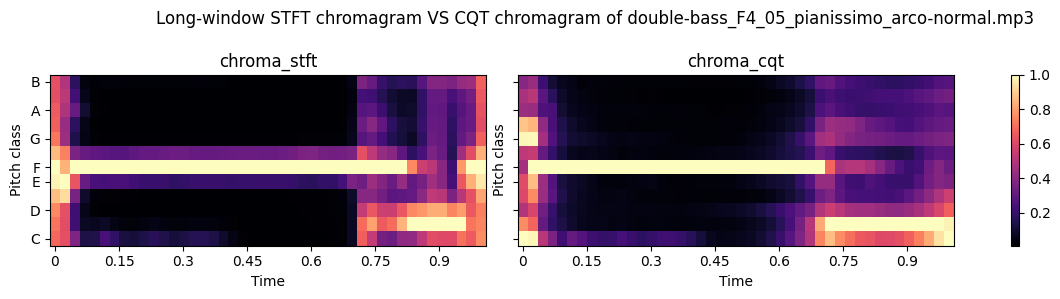

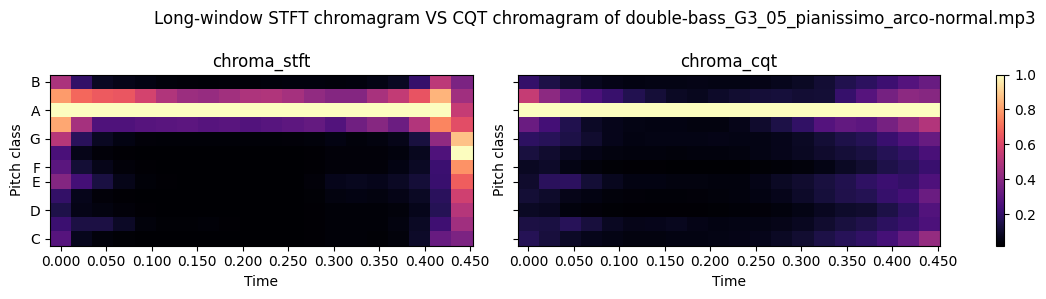

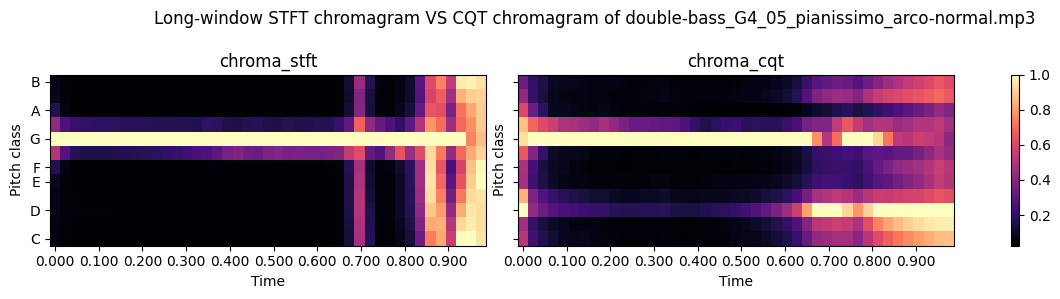

In [15]:
import librosa.segment
import librosa.feature

ch_stft ={}

for inst in quartet:
  directory = os.listdir(dirpath+'/'+inst)
  for i in directory:
    filename=i.removeprefix('{}_'.format(inst.replace(' ','-')))    
    if filename in mysounds and re.findall('(C4|D4|E4|F4|G3|G4|A3|B3)_05_pianissimo_arco-normal.mp3', filename):
# load files
      y, sr = librosa.load(dirpath+'/'+inst+'/'+i)


      chromacqt = librosa.feature.chroma_cqt(y=y, sr=sr)
      chromastft= librosa.feature.chroma_stft(y=y, sr=sr)

      ch_stft[i]=chromastft
      
      fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 3), dpi=100, sharex=True, sharey=True)
      fig.suptitle('Long-window STFT chromagram VS CQT chromagram of '+i)
      librosa.display.specshow(chromastft, y_axis='chroma', x_axis='time', ax=ax[0])
      ax[0].set(title='chroma_stft')
      ax[0].label_outer()
      img = librosa.display.specshow(chromacqt, y_axis='chroma', x_axis='time', ax=ax[1])
      ax[1].set(title='chroma_cqt')
      fig.tight_layout()
      fig.colorbar(img, ax=ax)

  plt.show()


In the comparison above we notice that the STFT chromagram seems more sensitive to slight changes in the pitch class, being able to capture more variations and nuances in sound, while the CQT chromagram is less precise but good for the pitch detection per se because approximates and defines more drastically the note's class. 

Considering that we want to see the nuances of the pitch for a sort of feature detection while tagging the right instrument to the sound, the *chroma_stft* seems to be the most suitable choice for the task.

It seems that the chromagrams might be a useful mean to deduce the instrument from, seeing the drastic change from one plot to the other with particular reference to the precision of detection from the STFT transformed files. As an example, the viola always presents a barrier on the left, right or both of value approximately close to 1, that makes its samples clearly distinguishable.

The following plot of recurrent features matrices could be helpful to visualize better the differences between instruments and their correspondent samples.

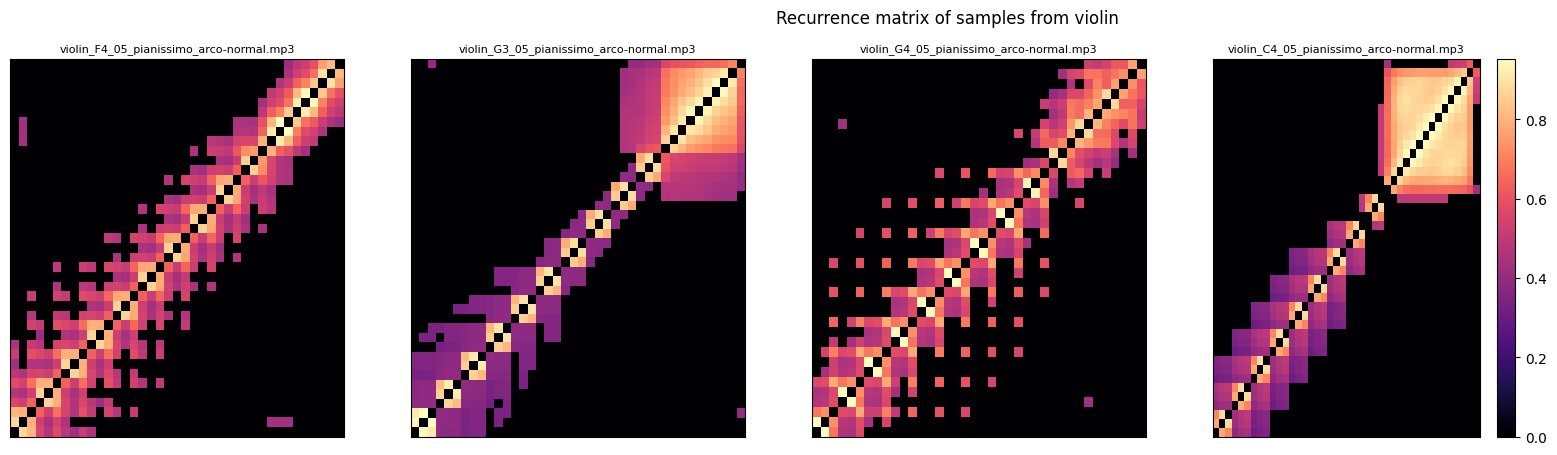

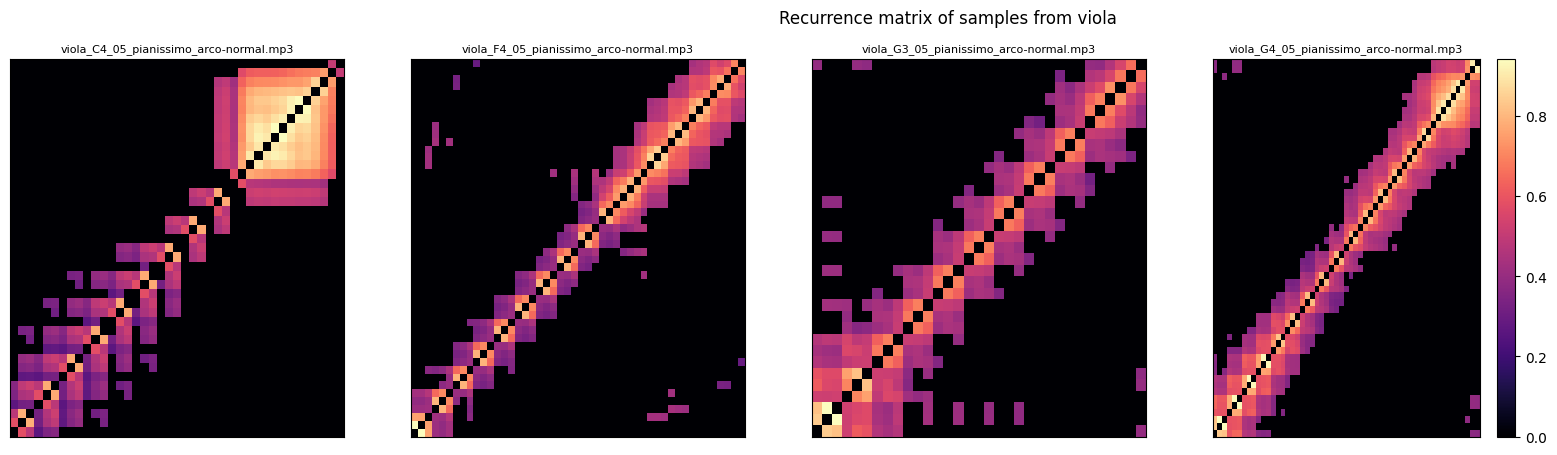

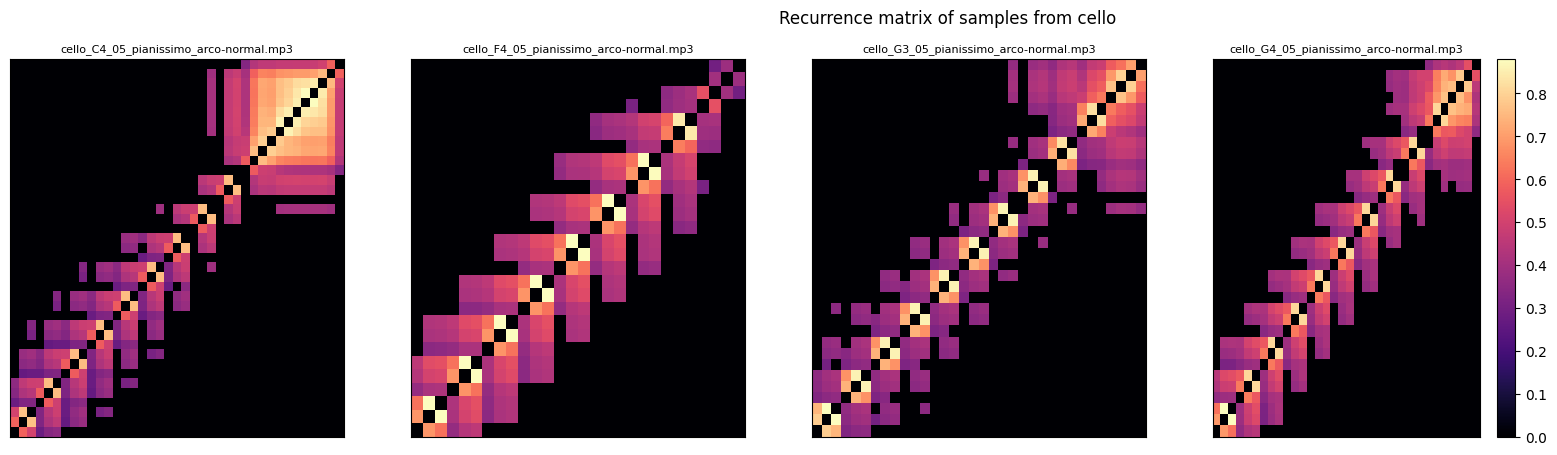

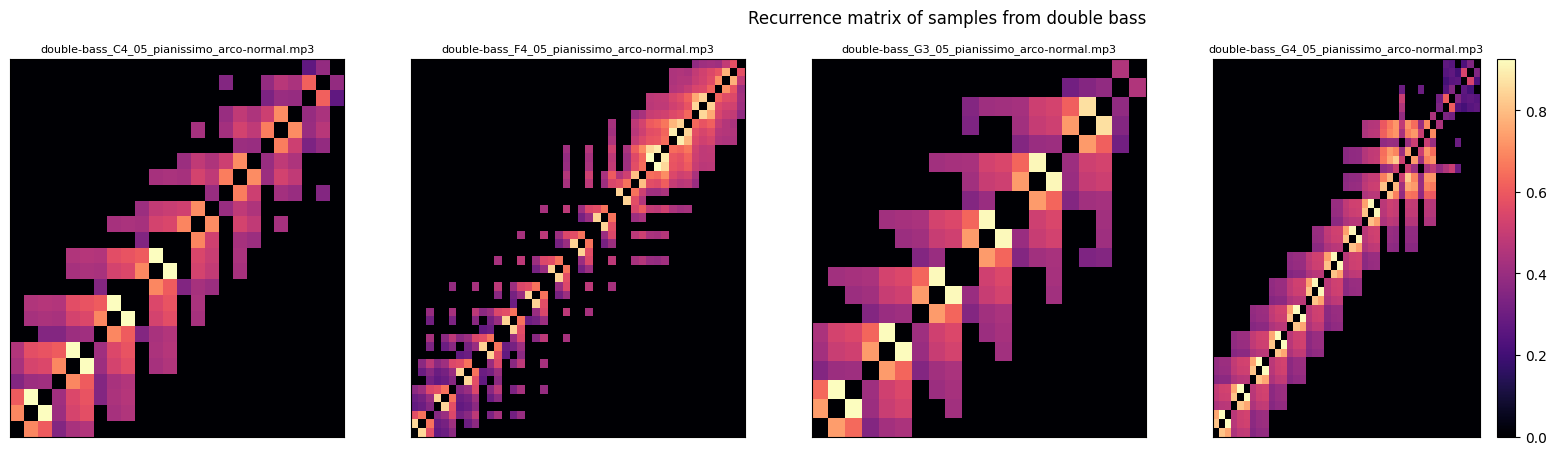

In [16]:
for inst in quartet:
  fig = plt.figure(figsize=(25, 5), dpi=100)
  fig.suptitle('Recurrence matrix of samples from '+inst)
  
  k=0

  for i, c in ch_stft.items():
    if re.findall(inst, i.replace('-', ' ')):

# Use time-delay embedding to get a cleaner recurrence matrix
      chroma_stack = librosa.feature.stack_memory(c, n_steps=10, delay=3) 
      R = librosa.segment.recurrence_matrix(chroma_stack,
                                             mode='affinity',
                                             sym=True) 
# plot
      k+=1
      ax = fig.add_subplot(1,5,k)
      ax.title.set_text(i)
      ax.title.set_size(8)
      img = librosa.display.specshow(R)
  fig.colorbar(img, ax=ax)
  plt.show()

Finally, a decomposition of those feature matrices into components and activations is operated on the audio files of type *05 pianissimo - arco normal* (those in out focus until now), in order to observe the underlying components of the audio files.

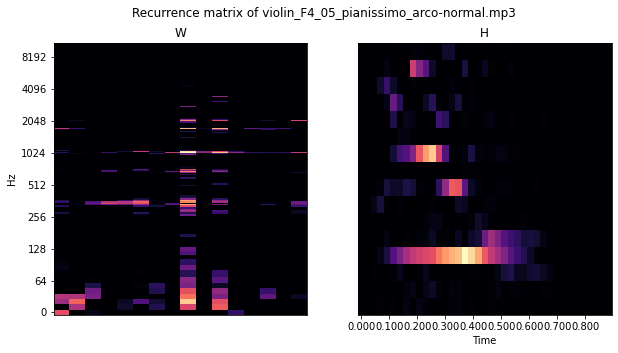

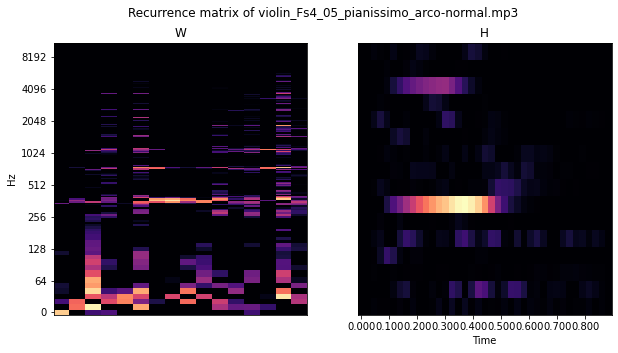

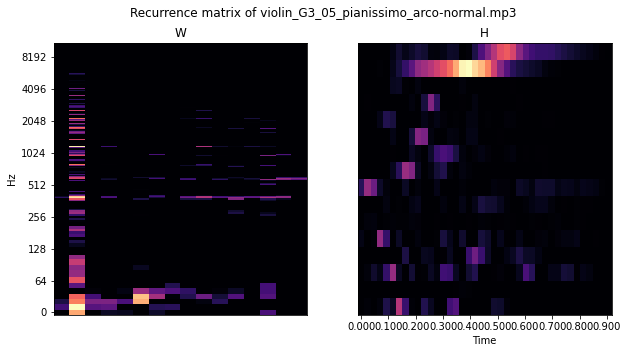

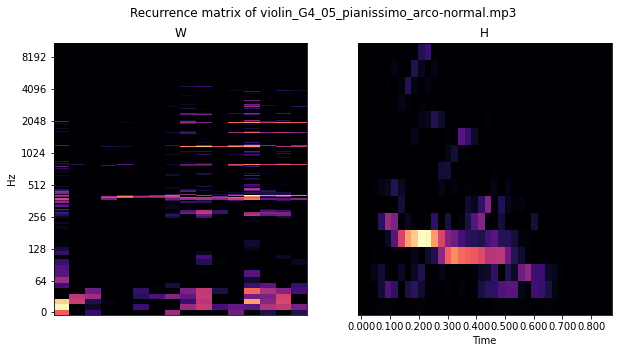

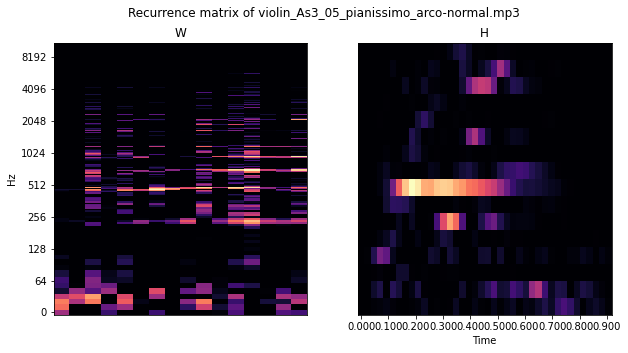

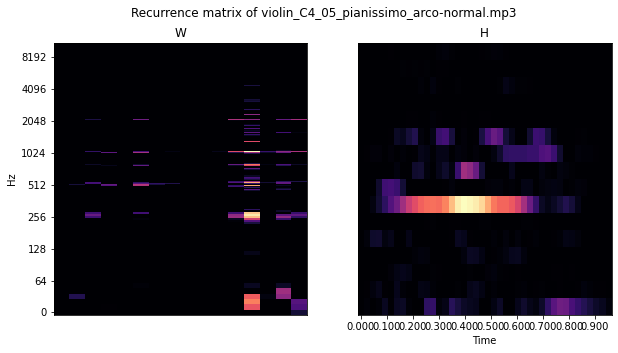

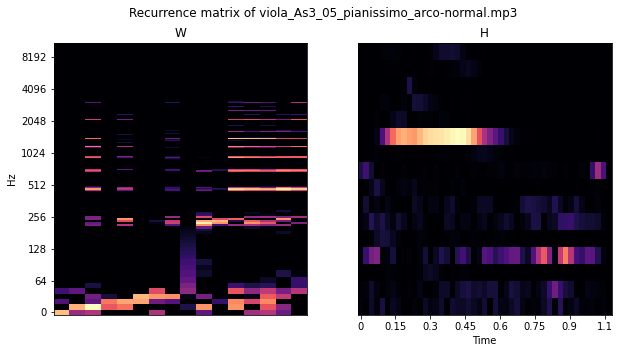

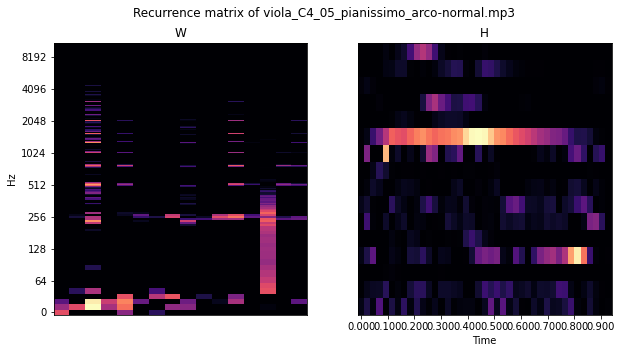

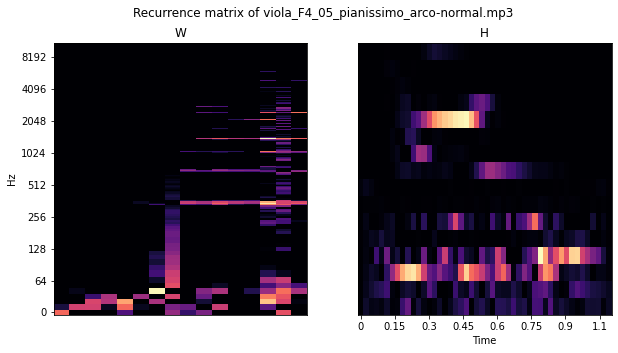

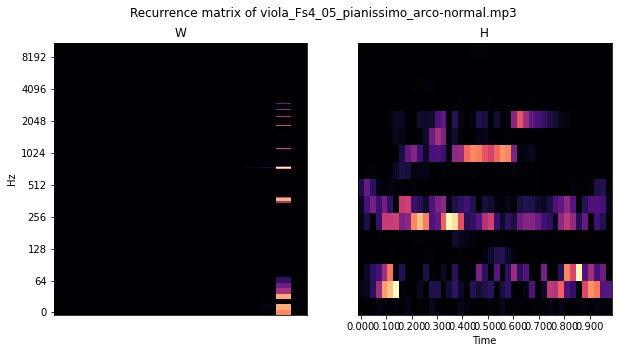

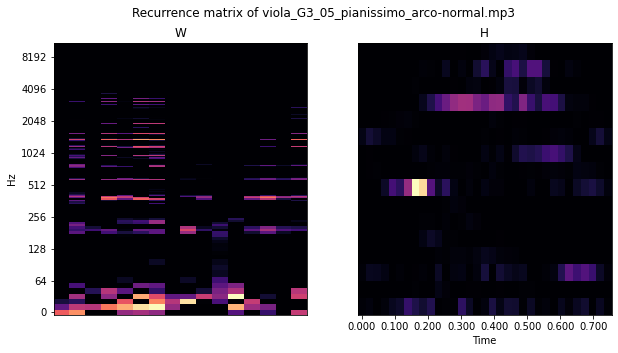

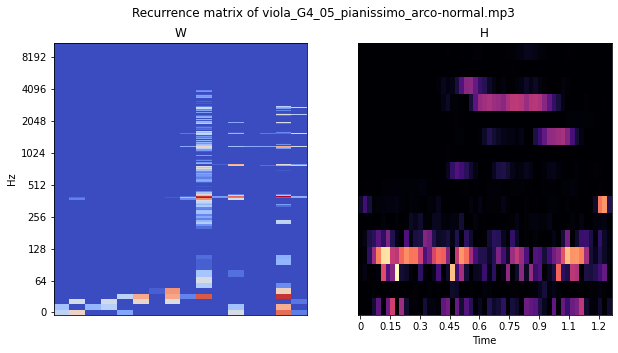

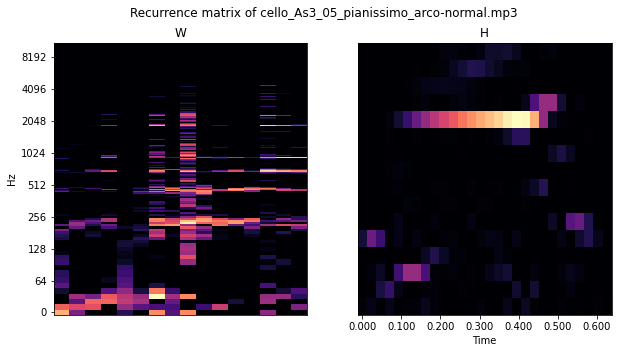

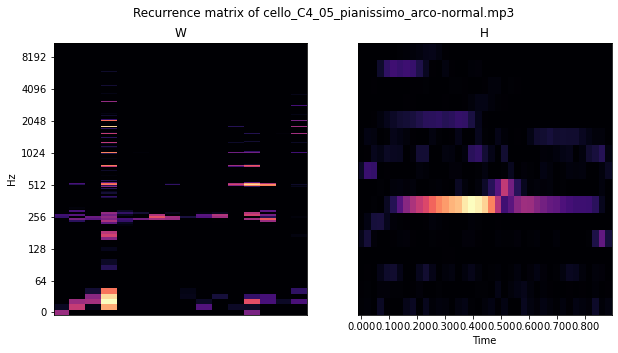

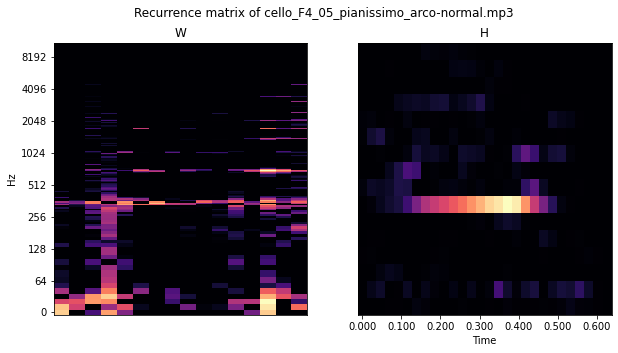

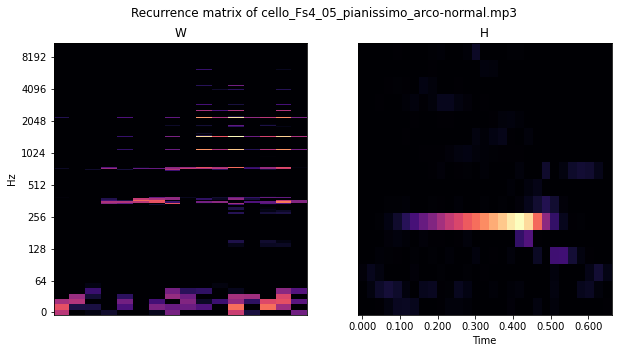

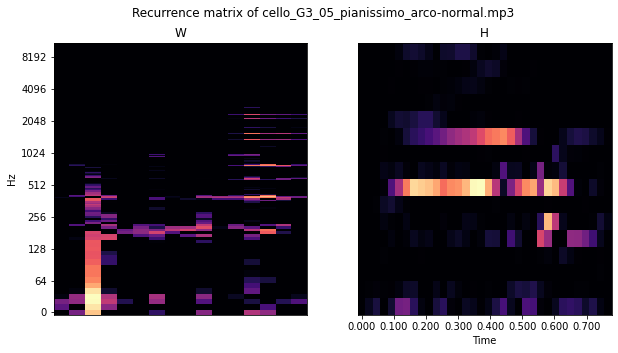

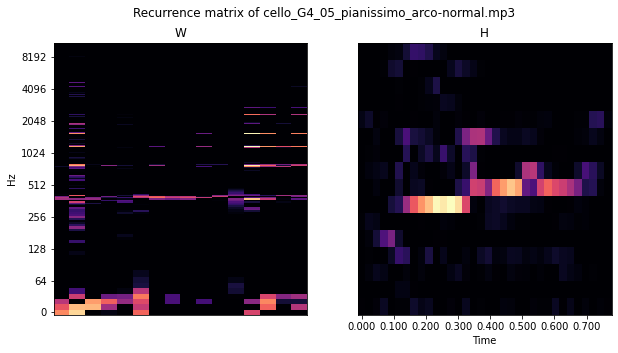

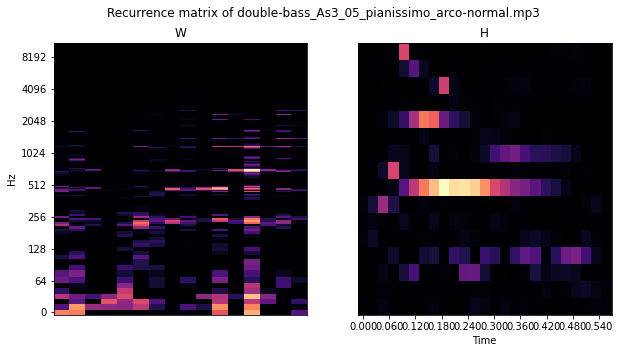

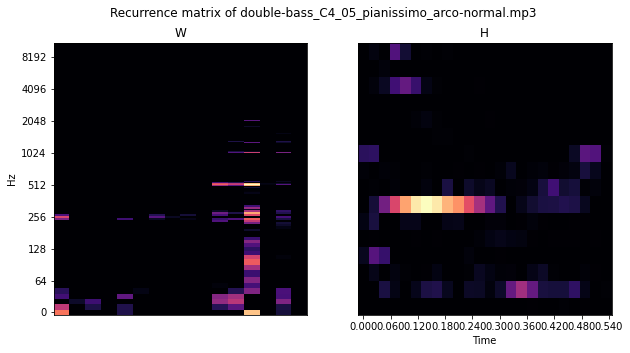

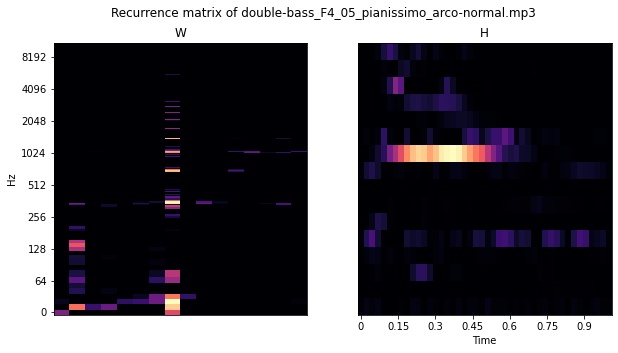

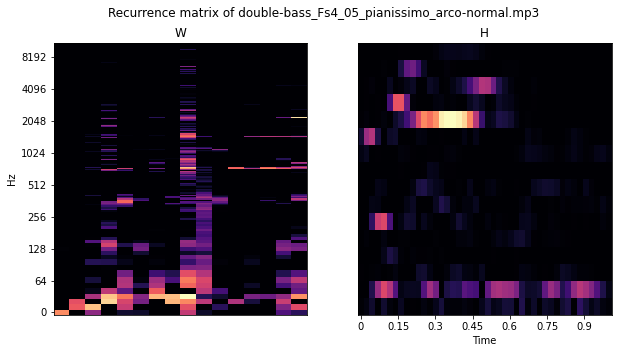

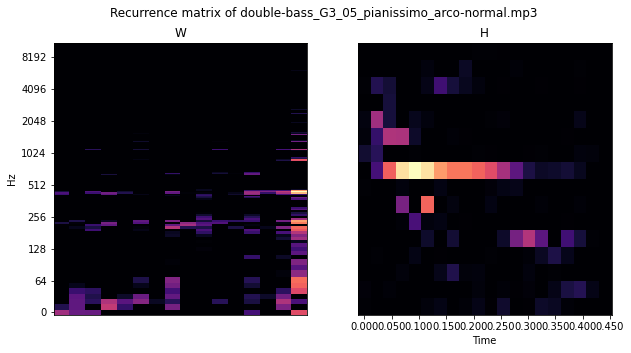

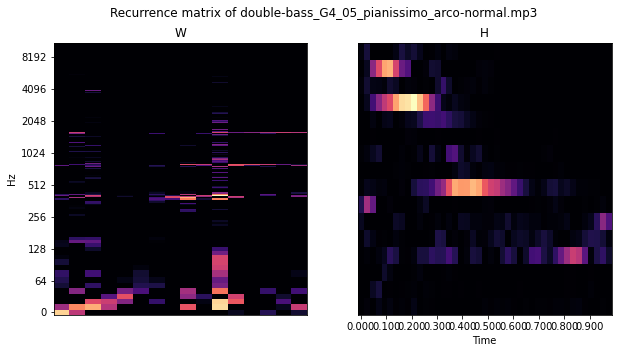

In [17]:
import librosa.decompose


for i,D in stft.items():
# Separate a complex-valued spectrogram D into its magnitude (S) and phase (P) components  
  S, phase = librosa.magphase(D) 

# Harmonic-percussive source separation
  D_harm, D_perc = librosa.decompose.hpss(D) 

# Inverse short-time Fourier transform (ISTFT)
  y_harm = librosa.istft(D_harm) 
  y_perc = librosa.istft(D_perc)

# Fit the model
  W, H = librosa.decompose.decompose(S, n_components=16, sort=True)

  fig = plt.figure(figsize=(10, 5))
  fig.suptitle('Recurrence matrix of '+ i)

# matrix of components (basis elements)
  plt.subplot(1, 2, 1), plt.title('W')
  librosa.display.specshow(librosa.amplitude_to_db(W**2), y_axis='log') 
# transformed matrix/activation matrix
  plt.subplot(1, 2, 2), plt.title('H')
  librosa.display.specshow(H, x_axis='time')
  